In [2]:
import os
import pandas as pd
import csv
import re
import numpy as np


In [1]:
# Connect to Meet Manager Access DB. Need to download generic version of database
# https://activenetwork.my.salesforce-sites.com/hytekswimming/articles/en_US/Article/Export-Generic-Data-in-MS-Access
""""

import csv
import pyodbc

from mdb_parser import MDBParser, MDBTable


MDB = '/Users/veesheenyuen/Desktop/DataScience/SAA/MM/GenericData-84th Singapore Open Track - Field-18Apr2024-001.mdb'
DRV = '{Microsoft Access Driver (*.mdb)}'
#PWD = 'mypassword'

#conn = pyodbc.connect('DRIVER=%s;DBQ=%s;PWD=%s' % (DRV,MDB,PWD))
conn = pyodbc.connect('DRIVER=%s;DBQ=%s' % (DRV,MDB))

curs = conn.cursor()

SQL = 'SELECT * FROM mytable;' # insert your query here
curs.execute(SQL)

rows = curs.fetchall()

curs.close()
conn.close()

# you could change the 'w' to 'a' for subsequent queries
csv_writer = csv.writer(open('mytable.csv', 'w'), lineterminator='\n')

for row in rows:
    csv_writer.writerow(row)
    
    
"""

'"\n\nimport csv\nimport pyodbc\n\nfrom mdb_parser import MDBParser, MDBTable\n\n\nMDB = \'/Users/veesheenyuen/Desktop/DataScience/SAA/MM/GenericData-84th Singapore Open Track - Field-18Apr2024-001.mdb\'\nDRV = \'{Microsoft Access Driver (*.mdb)}\'\n#PWD = \'mypassword\'\n\n#conn = pyodbc.connect(\'DRIVER=%s;DBQ=%s;PWD=%s\' % (DRV,MDB,PWD))\nconn = pyodbc.connect(\'DRIVER=%s;DBQ=%s\' % (DRV,MDB))\n\ncurs = conn.cursor()\n\nSQL = \'SELECT * FROM mytable;\' # insert your query here\ncurs.execute(SQL)\n\nrows = curs.fetchall()\n\ncurs.close()\nconn.close()\n\n# you could change the \'w\' to \'a\' for subsequent queries\ncsv_writer = csv.writer(open(\'mytable.csv\', \'w\'), lineterminator=\'\n\')\n\nfor row in rows:\n    csv_writer.writerow(row)\n    \n    \n'

## Process MM RTF file

In [2]:
# Parse and extract MM RTF files 

import pandas as pd
import re

from striprtf.striprtf import rtf_to_text


with open('/Users/veesheenyuen/Desktop/DataScience/SAA/MM/sgo24.rtf', 'r') as file:
    text = file.read()
    con=rtf_to_text(text)

In [3]:
con

"Singapore Athletics Assoc.-Open Champ - Organization License\nHy-Tek's MEET MANAGER  7:12 PM  24/4/2024  Page 1\n84th Singapore Open Track & Field - 18/4/2024 to 19/4/2024\nChampionships 2024\nSingapore Sportshub\nResults\nWomen 100 Meter Dash Open\n=================================================================================\n    Name                     Age Team                    Seed    Prelims  Wind H#\n=================================================================================\nPreliminaries\n  1 Tan, Elizabeth-Ann        21 Singapore              11.74      12.00Q  0.1  2\n  2 Kim, Soeun                21 South Korea            11.99      12.49Q  0.1  1\n  3 Ong, Kerstin              27 Singapore              12.56      12.59Q  0.1  2\n  4 Poh, Sarah                23 Wings Athlet           12.87      12.71Q  0.1  1\n  5 Chaiyaphet, Pataravade    16 Wings Athlet           12.08      12.78Q  0.1  1\n  6 Benedette, Leong          20 Trackstar Athletics    12.92      13.

In [4]:
df=pd.DataFrame(re.split('\n', con))

In [68]:
re.split('\n', con)

['Singapore Athletics Assoc.-Open Champ - Organization License',
 "Hy-Tek's MEET MANAGER  7:12 PM  24/4/2024  Page 1",
 '84th Singapore Open Track & Field - 18/4/2024 to 19/4/2024',
 'Championships 2024',
 'Singapore Sportshub',
 'Results',
 'Women 100 Meter Dash Open',
 '=================================================================================',
 '    Name                     Age Team                    Seed    Prelims  Wind H#',
 '=================================================================================',
 'Preliminaries',
 '  1 Tan, Elizabeth-Ann        21 Singapore              11.74      12.00Q  0.1  2',
 '  2 Kim, Soeun                21 South Korea            11.99      12.49Q  0.1  1',
 '  3 Ong, Kerstin              27 Singapore              12.56      12.59Q  0.1  2',
 '  4 Poh, Sarah                23 Wings Athlet           12.87      12.71Q  0.1  1',
 '  5 Chaiyaphet, Pataravade    16 Wings Athlet           12.08      12.78Q  0.1  1',
 '  6 Benedette, Leong 

In [52]:
df.iloc[8][0]

'    Name                     Age Team                    Seed    Prelims  Wind H#'

In [69]:
columns=df.iloc[8][0].split(' ')

In [71]:
new_list = [x for x in columns if x != ""]

In [72]:
new_list

['Name', 'Age', 'Team', 'Seed', 'Prelims', 'Wind', 'H#']

In [11]:
df.iloc[10][0]

'Preliminaries'

In [12]:
df.iloc[11][0]

'  1 Tan, Elizabeth-Ann        21 Singapore              11.74      12.00Q  0.1  2'

In [13]:
df.iloc[12][0]

'  2 Kim, Soeun                21 South Korea            11.99      12.49Q  0.1  1'

In [18]:
string=df.iloc[11][0]

In [21]:
print(string[:3])

  1


In [28]:
print(string[4:29])

Tan, Elizabeth-Ann       


In [30]:
print(string[30:32])

21


In [37]:
print(string[33:55])

Singapore             


In [45]:
print(string[56:66])

11.74     


In [44]:
print(string[67:73])

12.00Q


In [47]:
print(string[74:78])

 0.1


In [50]:
print(string[80:82])

2


In [96]:
event_pattern='Singapore Open'
#result_pattern='(.\d\dm)'
#result_pattern='(\d\d\d\d\s[A-Z][a-z]+)'
#result_pattern='(\d\d\d\d\s[A-Z].+(.\d\dm))'
result_pattern='\d\d.\d\d'
#exclusion_pattern='(NH|DNS)'
exclusion_pattern='NONE'
gender_pattern='Men|Women'



In [207]:
#s='  1  1056 Tokai, Marika       24 Japan                 49.22m     47.78m'
#s='  6  1039 Guntur, Ibrahim     17 Indonesia              1.93m     J1.95m'
s=' ‑‑  1111 Chang, Cheng Huan   22 Safsa                               DNS'


match = re.search(exclusion_pattern, s)

print(match)

<re.Match object; span=(69, 72), match='DNS'>


In [105]:
## For new 2024 RTF format encountered

column_names=["Rank", "Name", "Age", "Team", "Age", "Seed", "Result", "Wind",  "Points", "Heat", "Gender", "Event", "Category_Event"]
    
output = pd.DataFrame(columns=column_names)



for index, row in df.iterrows(): # find row containing event details and column names
                           
        
        if 'Singapore Open' in row[0]: # splice competition name
            
            row=row[0]
            
                        
            position = re.search(event_pattern, row)
                                                  
            split_start=position.start()-5      
            split_end=position.end()
            
            competition=row[split_start:split_end]
            
        if 'Men' in row[0] or 'Women' in row[0]:   # splice gender and event
            
            row=row[0]
            
            position = re.search(gender_pattern, row)
                        
            split_start=position.start()
            split_end=position.end()
            
            gender=row[split_start:split_end]
                        
            event=row[split_end:]
                        
        if 'Name' in row[0]:    # splice column names
            
            row=row[0]
            
            list=row.split(' ')
            
            columns = [x for x in list if x != ""]
            
            columns.insert(0, 'Rank') # Insert missing 'Rank' column at the beginning
            
            temp_df = pd.DataFrame(columns=columns)
            
            print(columns)

            
            
        if 'Finals' in row:
            round='Finals'
                
        if 'Preliminaries' in row:
            round='Preliminaries'
            
            
        if 'Throw' in event:
            category_event='Throw'
        elif 'Jump' in event:
            category_event='Jump'
        elif 'Vault' in event:
            category_event='Jump'
        elif '100' in event:
            category_event='Sprint'
        elif '1500' in event:
            category_event='Mid'
        elif 'Javelin' in event:
            category_event='Throw'
        elif 'Shot' in event:
            category_event='Throw'
        elif '400' in event:
            category_event='Sprint'
        elif '800' in event:
            category_event='Mid'
        elif '400' in event:
            category_event='Sprint'
        elif 'Hurdles' in event:
            category_event='Hurdles'
        elif '200' in event:
            category_event='Sprint'
        elif 'Walk' in event:
            category_event='Walk'
        elif '3000' in event:
            category_event='Long'
        elif '5000' in event:
            category_event='Long'
        elif '2000' in event:
            category_event='Mid'
        elif 'Discus' in event:
            category_event='Throw'
                
        if 'Relay' in event: # Change from Sprint to Relay for relays only
            category_event='Relay'           
            
            
        if re.search(result_pattern, row[0]):  # if row matches pattern with results
            
            string=row[0]
                        
            rank=string[0:3]  # slice string to extract ranking
                        
            name=string[4:29]
            
            age = string[30:32]
                        
            team = string[33:55]
            
            remainder=string[56:].strip()
                        
            remainder=re.sub("\s+", " ", remainder) # remove extraneous spaces from string
            
                  
            if not re.search(exclusion_pattern, remainder):   # drop those with NH, DNS or NWI
   
                list=remainder.split(' ')   # convert string to list   
            
                combined=rank+ ';'+name+'; '+ age +'; ' + team + '; '+'; '.join(list)  # use ';' in case names have a ','
                
                row=combined.split(';')
                
                print(row)
                
                            
                temp_df.loc[len(temp_df)] = row
                
                


output['Division'] = ''
output['Stage'] = ''
output['Date'] = '2024'
output['Competition'] = 'Meet Manager'
output['Qualification']=''
output['Points']=''
output['Lane']=''
output['Heat']=''
output['Unique_ID']=''
output['Country']=''
output['Dict_Results']=''
output['Region']='Local'
output['DOB']=''
output['Group']=''
output['Athlete_ID']=''
output['Source']='MM RTF file'
output['Remarks']=''
output['Timestamp']=''
output['Free_Field']=''
output['Free_Field2']=''
output['Free_Field3']=''



                        
output = output.reindex(columns= ['Rank', 'Tag_ID', 'Name', 'Team', 'Seed', 'Result', 'Qualification', 'Heat', 'Lane', 'Wind', 'Event', 'Division', 'Stage', 
                                  'Points', 'Age', 'Gender', 'Unique_ID', 'Country', 'Dict_Results', 'Date', 'Competition', 'Region', 'DOB','Group', 'Category_Event', 
                                  'Athlete_ID', 'Source', 'Remarks', 'Timestamp', 'Free_Field', 'Free_Field2', 'Free_Field3'])

                
output.to_csv('test_csv.csv', sep=',', encoding='utf-8-sig', index=False)

                
                                                                
    

['Rank', 'Name', 'Age', 'Team', 'Seed', 'Prelims', 'Wind', 'H#']
['  1', 'Tan, Elizabeth-Ann       ', ' 21', ' Singapore             ', ' 11.74', ' 12.00Q', ' 0.1', ' 2']
['  2', 'Kim, Soeun               ', ' 21', ' South Korea           ', ' 11.99', ' 12.49Q', ' 0.1', ' 1']
['  3', 'Ong, Kerstin             ', ' 27', ' Singapore             ', ' 12.56', ' 12.59Q', ' 0.1', ' 2']
['  4', 'Poh, Sarah               ', ' 23', ' Wings Athlet          ', ' 12.87', ' 12.71Q', ' 0.1', ' 1']
['  5', 'Chaiyaphet, Pataravade   ', ' 16', ' Wings Athlet          ', ' 12.08', ' 12.78Q', ' 0.1', ' 1']
['  6', 'Benedette, Leong         ', ' 20', ' Trackstar Athletics   ', ' 12.92', ' 13.08Q', ' 0.1', ' 2']
['  7', 'Silina, Pha Aphay        ', ' 28', ' Laos                  ', ' 12.62', ' 12.79q', ' 0.1', ' 1']
['  8', 'Abdul Aziz, Zara Almira  ', ' 17', ' Singapore Sp          ', ' 12.97', ' 13.11q', ' 0.1', ' 1']
['  9', 'Ortega, Samantha         ', ' 19', ' TeamFabian            ', ' 13.03', ' 13.1

ValueError: cannot set a row with mismatched columns

In [106]:
temp_df

,Rank,Name,Age,Team,Prelims,Finals,Wind,Points


In [9]:
# DO NOT TOUCH THIS. ORIGINAL RTF FORMAT.

column_names=["Rank", "Tag_ID", "Name", "Team", "Event", "Age", "Gender", "Category_Event", "Seed", "Result", "Wind"]
    
output = pd.DataFrame(columns=column_names)

print(df)


for index, row in df.iterrows(): # find row containing event details and column names
                           
        
        if 'Event' in row[0]:
            
            row=row[0]
                        
            row = row.replace("-", "-")

            position = re.search(event_pattern, row)
                                                
            split_end=position.end()      # adjust the splicing position to only capture the event name

            event=row[split_end:]
                                                
            
            if 'Men' in row:
                gender='Male'
                
            if 'Women' in row:
                gender='Female'    
                   
            if 'Finals' in event:
                round='Finals'
            
            
        if 'Throw' in event:
            category_event='Throw'
        elif 'Jump' in event:
            category_event='Jump'
        elif 'Vault' in event:
            category_event='Jump'
            

                    
            
            
        if re.search(result_pattern, row[0]):  # if row matches pattern with results
            
            string=row[0]
            
            rank=string[2:4]  # slice string to extract ranking
            
            ID=string[5:9]
            
            name=string[10:29]
            
            age = string[30:32]
                        
            team = string[33:55]
            
            remainder=string[56:].strip()
                        
            remainder=re.sub("\s+", " ", remainder) # remove extraneous spaces from string
                  
            if not re.search(exclusion_pattern, remainder):   # drop those with NH, DNS or NWI
   
                list=remainder.split(' ')   # convert string to list   
            
                combined=rank+ ';'+ID+'; '+ name +'; ' + team + '; '+event +'; '+age+'; '+gender+'; '+category_event+';'+'; '.join(list)  # use ';' in case names have a ','
                
                row=combined.split(';')
                
                
                pad_value = ' '
                pad_size = 11 - len(row)

                final_list = [*row, *[pad_value] * pad_size]  # add extra columns to make it 11
                
                output.loc[len(output)] = final_list


output['Division'] = ''
output['Stage'] = ''
output['Date'] = '2024'
output['Competition'] = 'Meet Manager'
output['Qualification']=''
output['Points']=''
output['Lane']=''
output['Heat']=''
output['Unique_ID']=''
output['Country']=''
output['Dict_Results']=''
output['Region']='Local'
output['DOB']=''
output['Group']=''
output['Athlete_ID']=''
output['Source']='MM RTF file'
output['Remarks']=''
output['Timestamp']=''
output['Free_Field']=''
output['Free_Field2']=''
output['Free_Field3']=''



                        
output = output.reindex(columns= ['Rank', 'Tag_ID', 'Name', 'Team', 'Seed', 'Result', 'Qualification', 'Heat', 'Lane', 'Wind', 'Event', 'Division', 'Stage', 
                                  'Points', 'Age', 'Gender', 'Unique_ID', 'Country', 'Dict_Results', 'Date', 'Competition', 'Region', 'DOB','Group', 'Category_Event', 
                                  'Athlete_ID', 'Source', 'Remarks', 'Timestamp', 'Free_Field', 'Free_Field2', 'Free_Field3'])

                
output.to_csv('test_csv.csv', sep=',', encoding='utf-8-sig', index=False)

                
                                                                
    

                                                     0
0    Singapore Athletics Assoc.-Open Champ - Organi...
1    Hy-Tek's MEET MANAGER  7:12 PM  24/4/2024  Page 1
2    84th Singapore Open Track & Field - 18/4/2024 ...
3                                   Championships 2024
4                                  Singapore Sportshub
..                                                 ...
499    2 Lim, Jerron               27 Erovra Club  ...
500    3 R, Subramaniam            61 Swift        ...
501                                                   
502                                                   
503                                                   

[504 rows x 1 columns]


AttributeError: 'NoneType' object has no attribute 'end'

In [10]:
df.head(50)

,0
0,Singapore Athletics Assoc.-Open Champ - Organi...
1,Hy-Tek's MEET MANAGER 7:12 PM 24/4/2024 Page 1
2,84th Singapore Open Track & Field - 18/4/2024 ...
3,Championships 2024
4,Singapore Sportshub
5,Results
6,Women 100 Meter Dash Open
7,==============================================...
8,Name Age Team ...
9,==============================================...


In [37]:
output.dropna(how="all", axis=1, inplace=True)

In [38]:
output

,Rank,Tag_ID,Name,Team,Seed,Result,Qualification,Heat,Lane,Wind,...,DOB,Group,Category_Event,Athlete_ID,Source,Remarks,Timestamp,Free_Field,Free_Field2,Free_Field3
0,1,1016,Binte Mohamad Nafi,Club Zoom,1.60m,13.52m,,,,0.6,...,,,Jump,,MM RTF file,,,,,
1,2,1054,"Takeda, Sayuri",Japan,2.75m,13.25m,,,,2.0,...,,,Jump,,MM RTF file,,,,,
2,3,1058,"Yamane, Mei",Japan,2.89m,12.59m,,,,0.9,...,,,Jump,,MM RTF file,,,,,
3,4,1095,"Ng, Yee Lin, Fiona",NUS,0.32m,10.72m,,,,1.5,...,,,Jump,,MM RTF file,,,,,
4,5,1160,"Chow, Wan Ki Victo",WAC,0.51m,10.39m,,,,1.7,...,,,Jump,,MM RTF file,,,,,
5,6,1094,"Lim, Yan Rui",NUS,0.16m,10.28m,,,,‑0.4,...,,,Jump,,MM RTF file,,,,,
6,‑,1017,"Xu, Weixin",Club Zoom,1.20m,DNS,,,,NWI,...,,,Jump,,MM RTF file,,,,,
7,1,1161,"Goh, Chui Ling",WAC,1.51m,,,,,,...,,,Jump,,MM RTF file,,,,,
8,‑,1096,"Toh, Xiao Min",NUS,1.40m,NH,,,,,...,,,Jump,,MM RTF file,,,,,
9,1,1033,"Pramendra, Kumar P",India,4.75m,,,,,,...,,,Jump,,MM RTF file,,,,,


In [12]:
final_list

['2 ',
 '1159',
 ' Choi, Sin Ting     ',
 ' WAC                   ',
 '  Pole Vault Open',
 ' 23',
 ' Female',
 ' 3.21m',
 ' 2.80m',
 ' ']

In [175]:
combined

'2 ;1159; Choi, Sin Ting     ; ;  Pole Vault Open; ; 233.21m; 2.80m'

In [3]:
# Read and parse pdf from MM. Iterate over different tables using pdf.pages[0,1,2,etc.] to access different pages

import pdfplumber
import os

os.chdir('/Users/veesheenyuen/Desktop/DataScience/SAA/MM/') 

#file="sectrack_audit_2010_211-211.pdf"
#file="Session 13_13-end.pdf"
#file="Session 13_1-4.pdf"
#file="sectrack_audit_2010_28-28.pdf"
#file="Session 13_5-6.pdf"
file='ac3 full results.pdf'   # stranded pdf



#table_settings = {
#    "vertical_strategy": "text",
#    "horizontal_strategy": "text",
#    }


with pdfplumber.open(file) as pdf:
    
    page = pdf.pages[1]
    table=page.extract_table()
    text=page.extract_text()


splitted=text.splitlines()

splitted

["Singapore Athletics Assoc.-Open Champ - Organization License Hy-Tek's MEET MANAGER Page 2",
 'SA Allcomers Meet 3 - 13/3/2024 to 17/3/2024',
 'Home of Athletics',
 'Results',
 'Event 104 Women 400 Meter Hurdles (0.762m) U18',
 '===================================================================================',
 'U18: * 1:03.11 30/11/2008 Thirualkarasu Piriyah, Singapore',
 'Name Age Team Seed Finals H# Points',
 '===================================================================================',
 '1 # 2708 Choo, Jiayi 16 CG 1:13.03 2',
 '2 # 3192 Lui, Rui Xian 16 NYG 1:13.48 1',
 '3 # 2707 Chew, Caelyn 16 CG 1:13.97 2',
 "4 # 2856 Goh, Xu'En Hannah 16 SNG 1:19.30 1",
 '5 # 3206 Teo, Yan Jia 16 NYG 1:20.25 2',
 '6 # 2846 Chan, Chien Wen E 16 SNG 1:20.33 1',
 '7 # 3246 Wang, Jing Han Ka 15 NJC 1:27.60 1',
 '8 # 3225 Chai, Xin Ya 15 NJC 1:31.59 1:32.16 1',
 '9 # 3228 Goh, Zining Ameli 15 NJC 1:40.30 1',
 '-- # 3231 Heng, Yu Xuan Sar 16 NJC 1:19.97 DNS 1',
 '-- # 3183 Leong Jia Xin, 

## Process Old Schema

In [957]:
# Reading and processing CSV output from MM DB
# Use SQL Query 
#SELECT * FROM [Results] 
#LEFT JOIN [Athlete] ON [Athlete].[Comp_no] = [Results].[Comp_no]
#LEFT JOIN [Entries] ON [Entries].[Comp_no] = [Results].[Comp_no] AND [Entries].[Event_numltr]=[Results].[Event_numltr] 
#JOIN [Divisions] ON [Divisions].[Div_no]  = [Results].[Div_no]
#JOIN [Team] ON [Results].[Team_no] = [Team].[Team_no] 

# Reg_no = Unique ID
# Joining by Athlete ID does not work for relay events because ath_no for relays is 0 and the athletes table 
# doesn't have an ath_no of 0. There join tables using Comp_no

os.chdir('/Users/veesheenyuen/Desktop/DataScience/SAA/MM/mm_files/2024/')

df = pd.read_csv("GenericData-11th Club ZOOM Kindred Spirit 2024 - PEERS-23Nov2024-001.csv")


In [958]:
df

,Event_numltr,Rnd_ltr,MultiSubEvent_no,Trk_Field,Ind_rel,Event_gender,Event_dist,Event_code,Event_name,Full_Eventname,...,Div_name.1,Team_region,Reg_abbr,Reg_name,Meet_name,Meet_header1,Meet_header2,Meet_location,Meet_start,Meet_end
0,101,F,0,T,I,F,80.0,A,Dash,Girls 4-6 80 Meter Dash U7,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
1,101,F,0,T,I,F,80.0,A,Dash,Girls 4-6 80 Meter Dash U7,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
2,101,F,0,T,I,F,80.0,A,Dash,Girls 4-6 80 Meter Dash U7,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
3,101,F,0,T,I,F,80.0,A,Dash,Girls 4-6 80 Meter Dash U7,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
4,101,F,0,T,I,F,80.0,A,Dash,Girls 4-6 80 Meter Dash U7,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,238,F,0,F,I,M,0.0,M,Long Jump,Boys Long Jump U17,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
1940,238,F,0,F,I,M,0.0,M,Long Jump,Boys Long Jump U17,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
1941,238,F,0,F,I,M,0.0,M,Long Jump,Boys Long Jump U17,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
1942,238,F,0,F,I,M,0.0,M,Long Jump,Boys Long Jump U17,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000


In [959]:
# If meet_name is blank

#df['Meet_name'] = 'SSP Primary Schools Combined Events Invitational'

In [960]:
df.to_csv('check_columns.csv', sep=',', encoding='utf-8-sig', index=False)

In [961]:
df

,Event_numltr,Rnd_ltr,MultiSubEvent_no,Trk_Field,Ind_rel,Event_gender,Event_dist,Event_code,Event_name,Full_Eventname,...,Div_name.1,Team_region,Reg_abbr,Reg_name,Meet_name,Meet_header1,Meet_header2,Meet_location,Meet_start,Meet_end
0,101,F,0,T,I,F,80.0,A,Dash,Girls 4-6 80 Meter Dash U7,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
1,101,F,0,T,I,F,80.0,A,Dash,Girls 4-6 80 Meter Dash U7,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
2,101,F,0,T,I,F,80.0,A,Dash,Girls 4-6 80 Meter Dash U7,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
3,101,F,0,T,I,F,80.0,A,Dash,Girls 4-6 80 Meter Dash U7,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
4,101,F,0,T,I,F,80.0,A,Dash,Girls 4-6 80 Meter Dash U7,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,238,F,0,F,I,M,0.0,M,Long Jump,Boys Long Jump U17,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
1940,238,F,0,F,I,M,0.0,M,Long Jump,Boys Long Jump U17,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
1941,238,F,0,F,I,M,0.0,M,Long Jump,Boys Long Jump U17,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000
1942,238,F,0,F,I,M,0.0,M,Long Jump,Boys Long Jump U17,...,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,Yio Chu Kang Stadium,Yio Chu Kang Stadium,2024-11-23 00:00:00.000,2024-11-24 00:00:00.000


In [962]:
# Check number of columns

try:

    assert df.shape[1]==170  

    for index, row in df.iterrows():

#        assert re.search(gender_pattern, row['Event_gender']) is not None   # check format of gender input
        assert row['Full_Eventname'] != None
        assert row['Team_name'] != None 
           
        # Check column locations before loading

        assert df.columns.get_loc('Full_Eventname') == 9
        assert df.columns.get_loc('Comp_no') == 18
        assert df.columns.get_loc('Res_markDisplay') == 30
        assert df.columns.get_loc('Reg_name')==169

except:
    
    print('Assertion error. Data not loaded')




Assertion error. Data not loaded


In [963]:
# Use boolean masking to update full_eventnam field fo tris
# This is the only additional step for triathlon events

df['Event_dist'] = df['Event_dist'].astype("string") # convert event distance to string for concatenation


df.loc[df['Event_name'] == 'Triathlon', 'Full_Eventname'] = 'Triathlon'+ ' - ' + df['Event_dist'] +' '+df['MultiSubEvent_name']
df.loc[df['Event_name'] == 'Outdoor Pentathlon', 'Full_Eventname'] = 'Outdoor Pentathlon'+ ' - ' + df['Event_dist'] + ' '+ df['MultiSubEvent_name']
df.loc[df['Event_name'] == 'Decathlon', 'Full_Eventname'] = 'Decathlon'+ ' - ' + df['Event_dist'] +' '+df['MultiSubEvent_name']
df.loc[df['Event_name'] == 'Heptathlon', 'Full_Eventname'] = 'Heptathlon'+ ' - ' + df['Event_dist'] +' '+df['MultiSubEvent_name']




In [964]:
df_filtered = df[['Last_name', 'First_name', 'Event_gender', 'Birth_date', 'Ath_age', 'Comp_no', 'Team_name.1','Full_Eventname', 'ActualSeed_timeDisplay','Rnd_ltr',
                 'Res_heat', 'Res_lane', 'Res_markDisplay', 'Res_wind', 'Res_place', 'Res_note', 'Ath_no', 'Div_name', 'Relay_Ltr', 'RelayLeg1_Ath_no', 'RelayLeg1_Last_name', 'RelayLeg1_First_name',
                 'RelayLeg2_Ath_no', 'RelayLeg2_Last_name', 'RelayLeg2_First_name', 'RelayLeg3_Ath_no', 'RelayLeg3_Last_name', 'RelayLeg3_First_name', 'RelayLeg4_Ath_no', 'RelayLeg4_Last_name', 'RelayLeg4_First_name',
                 'RelayLeg5_Ath_no', 'RelayLeg5_Last_name', 'RelayLeg5_First_name', 'RelayLeg6_Ath_no', 'RelayLeg6_Last_name', 'RelayLeg6_First_name', 'RelayLeg7_Ath_no', 'RelayLeg7_Last_name', 'RelayLeg7_First_name',
                 'RelayLeg8_Ath_no', 'RelayLeg8_Last_name', 'RelayLeg8_First_name', 'Meet_name', 'Reg_no']].copy()


In [965]:
df_filtered

,Last_name,First_name,Event_gender,Birth_date,Ath_age,Comp_no,Team_name.1,Full_Eventname,ActualSeed_timeDisplay,Rnd_ltr,...,RelayLeg6_Last_name,RelayLeg6_First_name,RelayLeg7_Ath_no,RelayLeg7_Last_name,RelayLeg7_First_name,RelayLeg8_Ath_no,RelayLeg8_Last_name,RelayLeg8_First_name,Meet_name,Reg_no
0,Kaur,Kavneet,F,2018-01-08 00:00:00.000,6.0,806,Team saga,Girls 4-6 80 Meter Dash U7,,F,...,,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN
1,Lim,Megan Yue Ning,F,2018-08-11 00:00:00.000,6.0,900,UNA,Girls 4-6 80 Meter Dash U7,,F,...,,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN
2,Tan,Heem Ngia,F,2019-10-23 00:00:00.000,5.0,551,Reactiv,Girls 4-6 80 Meter Dash U7,,F,...,,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN
3,Tan,Heem Joo,F,2019-10-23 00:00:00.000,5.0,550,Reactiv,Girls 4-6 80 Meter Dash U7,,F,...,,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN
4,Ng,Mathea,F,2018-09-01 00:00:00.000,6.0,782,Team M&J,Girls 4-6 80 Meter Dash U7,,F,...,,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,Palaruan,Dayaw Aziel,M,2010-07-31 00:00:00.000,14.0,739,Team Cicada,Boys Long Jump U17,,F,...,,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN
1940,Vikram,Aarush,M,2010-11-29 00:00:00.000,14.0,825,Team saga,Boys Long Jump U17,,F,...,,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN
1941,Chen,Jarrett,M,2010-01-22 00:00:00.000,14.0,11,ActiveSG Athletics Club,Boys Long Jump U17,,F,...,,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN
1942,Tan,Joshua,M,2009-02-17 00:00:00.000,15.0,541,Raffles Institution,Boys Long Jump U17,5.56m,F,...,,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN


In [966]:
#df_filtered["Last_name"] = np.where(df_filtered["Last_name"] == ".", ' ', ' ')

#df_filtered['Name']= df_filtered['First_name']

In [967]:
df_filtered['Name']= df_filtered['Last_name'] + ', '+ df_filtered['First_name']

In [968]:
df_filtered.drop(['Last_name', 'First_name'], axis=1, inplace=True)


In [969]:
df_filtered.dropna(how='all', axis=1, inplace=True)  # if Res_note or birth_date are empty they will get dropped!

In [970]:
#df_filtered = df_filtered.dropna(subset=df_filtered.columns.difference(['Res_note'])) # drop na but keep Res_note column


In [971]:
df_filtered

,Event_gender,Birth_date,Ath_age,Comp_no,Team_name.1,Full_Eventname,ActualSeed_timeDisplay,Rnd_ltr,Res_heat,Res_lane,...,RelayLeg6_First_name,RelayLeg7_Ath_no,RelayLeg7_Last_name,RelayLeg7_First_name,RelayLeg8_Ath_no,RelayLeg8_Last_name,RelayLeg8_First_name,Meet_name,Reg_no,Name
0,F,2018-01-08 00:00:00.000,6.0,806,Team saga,Girls 4-6 80 Meter Dash U7,,F,2,7,...,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Kaur, Kavneet"
1,F,2018-08-11 00:00:00.000,6.0,900,UNA,Girls 4-6 80 Meter Dash U7,,F,3,6,...,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Lim, Megan Yue Ning"
2,F,2019-10-23 00:00:00.000,5.0,551,Reactiv,Girls 4-6 80 Meter Dash U7,,F,2,2,...,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Tan, Heem Ngia"
3,F,2019-10-23 00:00:00.000,5.0,550,Reactiv,Girls 4-6 80 Meter Dash U7,,F,1,2,...,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Tan, Heem Joo"
4,F,2018-09-01 00:00:00.000,6.0,782,Team M&J,Girls 4-6 80 Meter Dash U7,,F,2,5,...,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Ng, Mathea"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,M,2010-07-31 00:00:00.000,14.0,739,Team Cicada,Boys Long Jump U17,,F,1,4,...,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Palaruan, Dayaw Aziel"
1940,M,2010-11-29 00:00:00.000,14.0,825,Team saga,Boys Long Jump U17,,F,1,5,...,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Vikram, Aarush"
1941,M,2010-01-22 00:00:00.000,14.0,11,ActiveSG Athletics Club,Boys Long Jump U17,,F,1,6,...,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Chen, Jarrett"
1942,M,2009-02-17 00:00:00.000,15.0,541,Raffles Institution,Boys Long Jump U17,5.56m,F,1,7,...,,0,,,0,,,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Tan, Joshua"


In [972]:
# reinsert if dropped by na

#df_filtered.insert(1, 'Birth_date', ' ')

In [973]:
df_filtered['Relay1_Leg_Name']= df_filtered['RelayLeg1_Last_name'] + ', '+ df_filtered['RelayLeg1_First_name']
df_filtered['Relay2_Leg_Name']= df_filtered['RelayLeg2_Last_name'] + ', '+ df_filtered['RelayLeg2_First_name']
df_filtered['Relay3_Leg_Name']= df_filtered['RelayLeg3_Last_name'] + ', '+ df_filtered['RelayLeg3_First_name']
df_filtered['Relay4_Leg_Name']= df_filtered['RelayLeg4_Last_name'] + ', '+ df_filtered['RelayLeg4_First_name']
df_filtered['Relay5_Leg_Name']= df_filtered['RelayLeg5_Last_name'] + ', '+ df_filtered['RelayLeg5_First_name']
df_filtered['Relay6_Leg_Name']= df_filtered['RelayLeg6_Last_name'] + ', '+ df_filtered['RelayLeg6_First_name']
df_filtered['Relay7_Leg_Name']= df_filtered['RelayLeg7_Last_name'] + ', '+ df_filtered['RelayLeg7_First_name']
df_filtered['Relay8_Leg_Name']= df_filtered['RelayLeg8_Last_name'] + ', '+ df_filtered['RelayLeg8_First_name']

In [974]:
df_filtered.drop(['RelayLeg1_Last_name', 'RelayLeg1_First_name', 'RelayLeg2_Last_name', 'RelayLeg2_First_name',
                 'RelayLeg3_Last_name', 'RelayLeg3_First_name', 'RelayLeg4_Last_name', 'RelayLeg4_First_name',
                 'RelayLeg5_Last_name', 'RelayLeg5_First_name', 'RelayLeg6_Last_name', 'RelayLeg6_First_name',
                 'RelayLeg7_Last_name', 'RelayLeg7_First_name', 'RelayLeg8_Last_name', 'RelayLeg8_First_name'], axis=1, inplace=True)

#df_filtered.drop_duplicates(inplace=True)

In [975]:
df_filtered

,Event_gender,Birth_date,Ath_age,Comp_no,Team_name.1,Full_Eventname,ActualSeed_timeDisplay,Rnd_ltr,Res_heat,Res_lane,...,Reg_no,Name,Relay1_Leg_Name,Relay2_Leg_Name,Relay3_Leg_Name,Relay4_Leg_Name,Relay5_Leg_Name,Relay6_Leg_Name,Relay7_Leg_Name,Relay8_Leg_Name
0,F,2018-01-08 00:00:00.000,6.0,806,Team saga,Girls 4-6 80 Meter Dash U7,,F,2,7,...,NaN,"Kaur, Kavneet",",",",",",",",",",",",",",",","
1,F,2018-08-11 00:00:00.000,6.0,900,UNA,Girls 4-6 80 Meter Dash U7,,F,3,6,...,NaN,"Lim, Megan Yue Ning",",",",",",",",",",",",",",",","
2,F,2019-10-23 00:00:00.000,5.0,551,Reactiv,Girls 4-6 80 Meter Dash U7,,F,2,2,...,NaN,"Tan, Heem Ngia",",",",",",",",",",",",",",",","
3,F,2019-10-23 00:00:00.000,5.0,550,Reactiv,Girls 4-6 80 Meter Dash U7,,F,1,2,...,NaN,"Tan, Heem Joo",",",",",",",",",",",",",",",","
4,F,2018-09-01 00:00:00.000,6.0,782,Team M&J,Girls 4-6 80 Meter Dash U7,,F,2,5,...,NaN,"Ng, Mathea",",",",",",",",",",",",",",",","
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,M,2010-07-31 00:00:00.000,14.0,739,Team Cicada,Boys Long Jump U17,,F,1,4,...,NaN,"Palaruan, Dayaw Aziel",",",",",",",",",",",",",",",","
1940,M,2010-11-29 00:00:00.000,14.0,825,Team saga,Boys Long Jump U17,,F,1,5,...,NaN,"Vikram, Aarush",",",",",",",",",",",",",",",","
1941,M,2010-01-22 00:00:00.000,14.0,11,ActiveSG Athletics Club,Boys Long Jump U17,,F,1,6,...,NaN,"Chen, Jarrett",",",",",",",",",",",",",",",","
1942,M,2009-02-17 00:00:00.000,15.0,541,Raffles Institution,Boys Long Jump U17,5.56m,F,1,7,...,NaN,"Tan, Joshua",",",",",",",",",",",",",",",","


In [976]:
df_filtered.to_csv('check_columns.csv', sep=',', encoding='utf-8-sig', index=False)

In [977]:
# Replace NaNs with '-' in event name column 

df_filtered['Full_Eventname'] = df_filtered['Full_Eventname'].fillna('-')

In [978]:
# create dict for relay names

for i in range(len(df_filtered)):
    
    list_no=[]
    list_names=[]
    
    if 'Relay' in df_filtered.loc[i, 'Full_Eventname']:
        
        list_no.append(df_filtered.loc[i, 'RelayLeg1_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg2_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg3_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg4_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg5_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg6_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg7_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg8_Ath_no'])
        
        
        list_names.append(df_filtered.loc[i, 'Relay1_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay2_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay3_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay4_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay5_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay6_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay7_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay8_Leg_Name'])
        
        
        list_no = [i for i in list_no if i != 0]   # remove '0' entries
        
        list_names = [i for i in list_names if i != ' ,  ']    # remove blank entries
                
        res = {}
        for key in list_no:
            for value in list_names:
                res[key] = value
                list_names.remove(value)
                
                break
        
        df_filtered.at[i, 'Name'] = res  # must use .at for dict
                           
                



In [979]:
df_filtered.drop(['Relay_Ltr', 'RelayLeg1_Ath_no', 'RelayLeg2_Ath_no', 'RelayLeg3_Ath_no', 'RelayLeg4_Ath_no', 
                  'RelayLeg5_Ath_no', 'RelayLeg6_Ath_no', 'RelayLeg7_Ath_no', 'RelayLeg8_Ath_no', 'Relay1_Leg_Name',
                  'Relay2_Leg_Name', 'Relay3_Leg_Name', 'Relay4_Leg_Name', 'Relay5_Leg_Name', 'Relay6_Leg_Name',
                  'Relay7_Leg_Name', 'Relay8_Leg_Name'], axis=1, inplace=True)


In [980]:
df_filtered

,Event_gender,Birth_date,Ath_age,Comp_no,Team_name.1,Full_Eventname,ActualSeed_timeDisplay,Rnd_ltr,Res_heat,Res_lane,Res_markDisplay,Res_wind,Res_place,Res_note,Ath_no,Div_name,Meet_name,Reg_no,Name
0,F,2018-01-08 00:00:00.000,6.0,806,Team saga,Girls 4-6 80 Meter Dash U7,,F,2,7,16.69,-0.0,3,NaN,8,U7,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Kaur, Kavneet"
1,F,2018-08-11 00:00:00.000,6.0,900,UNA,Girls 4-6 80 Meter Dash U7,,F,3,6,18.37,-0.0,12,NaN,468,U7,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Lim, Megan Yue Ning"
2,F,2019-10-23 00:00:00.000,5.0,551,Reactiv,Girls 4-6 80 Meter Dash U7,,F,2,2,20.28,-0.0,16,NaN,560,U7,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Tan, Heem Ngia"
3,F,2019-10-23 00:00:00.000,5.0,550,Reactiv,Girls 4-6 80 Meter Dash U7,,F,1,2,23.95,-0.0,18,NaN,561,U7,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Tan, Heem Joo"
4,F,2018-09-01 00:00:00.000,6.0,782,Team M&J,Girls 4-6 80 Meter Dash U7,,F,2,5,18.29,-0.0,9,NaN,519,U7,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Ng, Mathea"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,M,2010-07-31 00:00:00.000,14.0,739,Team Cicada,Boys Long Jump U17,,F,1,4,4.84m,-0.1,6,NaN,661,U17,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Palaruan, Dayaw Aziel"
1940,M,2010-11-29 00:00:00.000,14.0,825,Team saga,Boys Long Jump U17,,F,1,5,5.21m,-1.0,4,NaN,218,U17,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Vikram, Aarush"
1941,M,2010-01-22 00:00:00.000,14.0,11,ActiveSG Athletics Club,Boys Long Jump U17,,F,1,6,5.13m,-0.5,5,NaN,343,U17,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Chen, Jarrett"
1942,M,2009-02-17 00:00:00.000,15.0,541,Raffles Institution,Boys Long Jump U17,5.56m,F,1,7,5.71m,-1.6,1,NaN,793,U17,11th Club ZOOM Kindred Spirit 2024 & PEERS,NaN,"Tan, Joshua"


In [981]:
df_filtered.to_csv('check_columns.csv', sep=',', encoding='utf-8-sig', index=False)

In [982]:
df_filtered['Name']=df_filtered['Name'].astype(str) # convert dict to str so duplicates can be dropped

df_filtered.drop_duplicates(inplace=True)    


In [17]:
df_filtered

NameError: name 'df_filtered' is not defined

In [984]:
# If 'Res_note' column is deleted this will add it back

df_filtered.insert(13,"Res_note", " ") # add this if Res_note column is dropped

ValueError: cannot insert Res_note, already exists

In [16]:
df_filtered['Res_note']

NameError: name 'df_filtered' is not defined

In [985]:
#df_filtered.rename(
#                columns={0: "GENDER", 1: "DOB", 2: "AGE", 3: "TAG_ID", 4: "TEAM", 5: "EVENT", 6: "SEED", 7: "STAGE", 8: "HEAT", 9: "LANE",
#                10: "RESULT", 11: "WIND", 12: "RANK", 13: "REMARKS", 14: "ATHLETE_ID", 15: "DIVISION"}, 
#                inplace=True
#                )

# Rename columns

df_filtered.columns = ['GENDER', 'DOB', 'AGE', 'TAG_ID', 'TEAM', 'EVENT', 'SEED', 'STAGE', 'HEAT', 'LANE', 'RESULT',
                      'WIND', 'RANK', 'REMARKS', 'ATHLETE_ID', 'DIVISION', 'COMPETITION', 'UNIQUE_ID', 'NAME']

df_filtered['QUALIFICATION']=''
df_filtered['POINTS']=''
df_filtered['COUNTRY']=''
df_filtered['DICT_RESULTS']=''
df_filtered['DATE']='2024'
df_filtered['REGION']='Local'
df_filtered['GROUP']=''
df_filtered['CATEGORY_EVENT']=''
df_filtered['SOURCE']='Meet Manager'
df_filtered['TIMESTAMP']=''
df_filtered['FREE_FIELD']=''
df_filtered['FREE_FIELD2']=''
df_filtered['FREE_FIELD3']=''

# Meet_location = VENUE column

# Map miscellaneous fields to final formats                            
                            
mask = df_filtered['STAGE'].str.contains(r'F', na=True)
df_filtered.loc[mask, 'STAGE'] = 'Final'

mask = df_filtered['STAGE'].str.contains(r'P', na=True)
df_filtered.loc[mask, 'STAGE'] = 'Preliminaries'
                                    
mask = df_filtered['GENDER'].isin(['F'])
df_filtered.loc[mask, 'GENDER'] = 'Female'

mask = df_filtered['GENDER'].isin(['M'])
df_filtered.loc[mask, 'GENDER'] = 'Male'

mask = df_filtered['GENDER'].isin(['X'])
df_filtered.loc[mask, 'GENDER'] = 'Mixed'


# Map general event category 

df_filtered.loc[df_filtered['EVENT'].str.contains(r'100 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'400 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'600 Meter', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'60 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'200 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'50 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'80 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'300 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'3000 Meter', na=True), 'CATEGORY_EVENT'] = 'Long'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Mile', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'5000 Meter', na=True), 'CATEGORY_EVENT'] = 'Long'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'2000 Meter', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'800 Meter', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'1500 Meter', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'10000 Meter', na=True), 'CATEGORY_EVENT'] = 'Long'

# Override values

df_filtered.loc[df_filtered['EVENT'].str.contains(r'Discus', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Javelin', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Shot', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Vault', na=True), 'CATEGORY_EVENT'] = 'Jump'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Throw', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Jump', na=True), 'CATEGORY_EVENT'] = 'Jump'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Relay', na=True), 'CATEGORY_EVENT'] = 'Relay'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Steeple', na=True), 'CATEGORY_EVENT'] = 'Steeple'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Walk', na=True), 'CATEGORY_EVENT'] = 'Walk'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Hurdles', na=True), 'CATEGORY_EVENT'] = 'Hurdles'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Pentathlon', na=True), 'CATEGORY_EVENT'] = 'Pentathlon'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Triathlon', na=True), 'CATEGORY_EVENT'] = 'Triathlon'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Decathlon', na=True), 'CATEGORY_EVENT'] = 'Decathlon'


# Rename conventions e.g. 100 Meters becomes 100m to be consistent with rest of dataset  

df_filtered.loc[df_filtered['EVENT'].str.contains(r'100.0 Dash', na=True), 'EVENT'] = '100m'
 
    

df_filtered = df_filtered.reindex(columns= ['RANK', 'TAG_ID', 'NAME', 'TEAM', 'SEED', 'RESULT', 'QUALIFICATION', 'HEAT', 'LANE', 'WIND', 'EVENT', 'DIVISION', 'STAGE', 
                                      'POINTS', 'AGE', 'GENDER', 'UNIQUE_ID', 'COUNTRY', 'DICT_RESULTS', 'DATE', 'COMPETITION', 'REGION', 'DOB','GROUP', 'CATEGORY_EVENT', 
                                      'ATHLETE_ID', 'SOURCE', 'REMARKS', 'TIMESTAMP', 'FREE_FIELD', 'FREE_FIELD2', 'FREE_FIELD3'])


In [986]:
df_filtered

,RANK,TAG_ID,NAME,TEAM,SEED,RESULT,QUALIFICATION,HEAT,LANE,WIND,...,DOB,GROUP,CATEGORY_EVENT,ATHLETE_ID,SOURCE,REMARKS,TIMESTAMP,FREE_FIELD,FREE_FIELD2,FREE_FIELD3
0,3,806,"Kaur, Kavneet",Team saga,,16.69,,2,7,-0.0,...,2018-01-08 00:00:00.000,,Sprint,8,Meet Manager,NaN,,,,
1,12,900,"Lim, Megan Yue Ning",UNA,,18.37,,3,6,-0.0,...,2018-08-11 00:00:00.000,,Sprint,468,Meet Manager,NaN,,,,
2,16,551,"Tan, Heem Ngia",Reactiv,,20.28,,2,2,-0.0,...,2019-10-23 00:00:00.000,,Sprint,560,Meet Manager,NaN,,,,
3,18,550,"Tan, Heem Joo",Reactiv,,23.95,,1,2,-0.0,...,2019-10-23 00:00:00.000,,Sprint,561,Meet Manager,NaN,,,,
4,9,782,"Ng, Mathea",Team M&J,,18.29,,2,5,-0.0,...,2018-09-01 00:00:00.000,,Sprint,519,Meet Manager,NaN,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,6,739,"Palaruan, Dayaw Aziel",Team Cicada,,4.84m,,1,4,-0.1,...,2010-07-31 00:00:00.000,,Jump,661,Meet Manager,NaN,,,,
1940,4,825,"Vikram, Aarush",Team saga,,5.21m,,1,5,-1.0,...,2010-11-29 00:00:00.000,,Jump,218,Meet Manager,NaN,,,,
1941,5,11,"Chen, Jarrett",ActiveSG Athletics Club,,5.13m,,1,6,-0.5,...,2010-01-22 00:00:00.000,,Jump,343,Meet Manager,NaN,,,,
1942,1,541,"Tan, Joshua",Raffles Institution,5.56m,5.71m,,1,7,-1.6,...,2009-02-17 00:00:00.000,,Jump,793,Meet Manager,NaN,,,,


In [987]:
# remove special characters etc.

for col in df_filtered.columns:
    df_filtered[col] = df_filtered[col].astype(str)
    df_filtered[col] = df_filtered[col].str.replace('\xa0', ' ', regex=True)
    df_filtered[col] = df_filtered[col].str.replace('[\x00-\x1f\x7f-\x9f]', '', regex=True)
    df_filtered[col] = df_filtered[col].str.replace('\r', ' ', regex=True)
    df_filtered[col] = df_filtered[col].str.replace('\n', ' ', regex=True)
    df_filtered[col] = df_filtered[col].str.strip()


 



In [988]:
df_filtered[df_filtered['NAME']=='CLARA']

,RANK,TAG_ID,NAME,TEAM,SEED,RESULT,QUALIFICATION,HEAT,LANE,WIND,...,DOB,GROUP,CATEGORY_EVENT,ATHLETE_ID,SOURCE,REMARKS,TIMESTAMP,FREE_FIELD,FREE_FIELD2,FREE_FIELD3


In [989]:
df_filtered.to_csv('Processed-GenericData-11th Club ZOOM Kindred Spirit 2024 - PEERS-23Nov2024-001.csv', sep=',', encoding='utf-8-sig', index=False)

## Process Latest Schema

In [209]:
# LATEST VERSION
# Reading and processing CSV output from MM DB -- CTE results combining meet info
# Use SQL Query 
#WITH test AS (
#          	SELECT * FROM [Results]
#			LEFT JOIN [Athlete] ON [Athlete].[Comp_no] = [Results].[Comp_no]
#			LEFT JOIN [Entries] ON [Entries].[Comp_no] = [Results].[Comp_no] AND [Entries].[Event_numltr]=[Results].[Event_numltr] 
#			JOIN [Divisions] ON [Divisions].[Div_no]  = [Results].[Div_no]
#			JOIN [Team] ON [Results].[Team_no] = [Team].[Team_no]
#
#        )
#        SELECT * FROM test, [Meet]

# Comp_no = TAG ID. Use Comp_no instead of Ath_no due to relay events not being joined as Ath_no for relay=0

# Extracts new columns from MM required for new schema




file="GenericData-Pesta Sukan Athletics 2024-27Jul2024-001_COMP_ID.csv"

os.chdir('/Users/veesheenyuen/Desktop/DataScience/SAA/MM/mm_files/2024/')

df = pd.read_csv(file)


/var/folders/q5/yf8g5p896_b94gkbhqcjx3t40000gn/T/ipykernel_22606/819031171.py:25: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


SCHEMA FIELD	DESCRIPTION	MEET MANAGER FIELD
RANK	Competition rank	Res_place
TAG_ID	Comp_no in MM	Comp_no
FIRST_NAME	First name	First_name
LAST_NAME	Last name	Last_name
OTHER_NAME	Middle/preferred/Chinese name	Pref_name
NAME	Full name	Concatenation of FIRST_NAME, LAST_NAME & OTHER_NAME
TEAM		Team_name
SEED		ActualSeed_timeDisplay
RESULT		Res_markDisplay
QUALIFICATION	Q or q	
HEAT		Res_heat
LANE		Res_lane
WIND	In m/s	Res_wind
EVENT		Event_name/Full_Eventname 
DIVISION	Masters, Open, U20/U18, A, B, C etc.	Div_name
STAGE	Finals, Semis, Heats 	Rnd_ltr
POINTS		
AGE		Ath_age
GENDER	Male/Female	Event_gender
UNIQUE_ID	Athlete Unique ID	Reg_no
NATIONALITY		Citizen_of
DICT_RESULTS	Dictionary of attempts for jumps or names for relay	
YEAR	Year of competition e.g. 2024	
COMPETITION	SEA Games etc.	Meet_name
REGION	Local or International	
DOB		Birth_date
GROUP		
CATEGORY_EVENT	High level category e.g. Jumps, Throws etc.	
ATHLETE_ID	From MM	Ath_no
SOURCE	Source url or file	
REMARKS	PB/SB etc.	Res_note
TIMESTAMP	Upload into BQ TS	
VENUE		Meet_location
DATE	Day and month 	
SUB_EVENT	e.g. Dash in Heptathlon	MultiSubEvent_name
SESSION	NSG session ID	
EVENT_CLASS	Weight or heigh class for shot put/hurdles etc.	Event_note
RX_TIME	Reaction time	
PRIMARY_EMAIL	email of athlete	
DISTANCE		Event_dist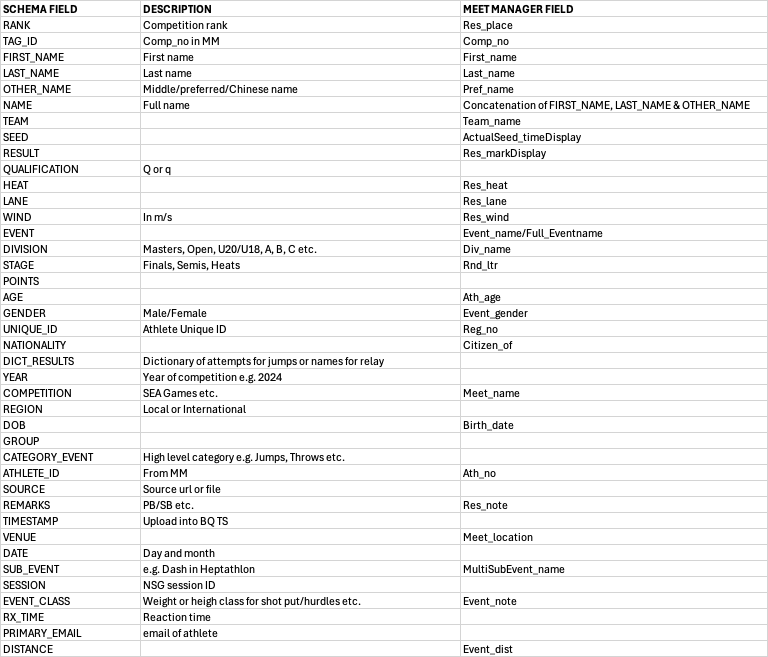

In [210]:
df.shape[1]

176

In [211]:
df.columns.get_loc('Full_Eventname')

#df.columns.get_loc('FULL_EVENTNAME')

9

In [212]:
df.columns.get_loc('Res_markDisplay')

#df.columns.get_loc('RES_MARKDISPLAY')

30

In [213]:
#df.columns.get_loc('MEET_NAME')

df.columns.get_loc('Meet_name')

170

In [214]:
df = df.astype(str)

In [215]:
df['MultiSubEvent_name']

0                Dash
1       Javelin Throw
2           Long Jump
3                Dash
4       Javelin Throw
            ...      
6165                 
6166                 
6167                 
6168                 
6169                 
Name: MultiSubEvent_name, Length: 6170, dtype: object

In [216]:
df['Event_name']

0          Triathlon
1          Triathlon
2          Triathlon
3          Triathlon
4          Triathlon
            ...     
6165    Discus Throw
6166    Discus Throw
6167    Discus Throw
6168    Discus Throw
6169       Long Jump
Name: Event_name, Length: 6170, dtype: object

In [217]:
df['Div_name']

0             U6
1             U6
2             U6
3             U6
4             U6
          ...   
6165         U15
6166         U15
6167         U15
6168         U15
6169    Para U13
Name: Div_name, Length: 6170, dtype: object

In [218]:
df['Event_dist']

0       60.0
1        0.0
2        0.0
3       60.0
4        0.0
        ... 
6165     0.0
6166     0.0
6167     0.0
6168     0.0
6169     0.0
Name: Event_dist, Length: 6170, dtype: object

In [219]:
df['Full_Eventname']

0                           nan
1                           nan
2                           nan
3                           nan
4                           nan
                 ...           
6165     Girls Discus Throw U15
6166     Girls Discus Throw U15
6167     Girls Discus Throw U15
6168     Girls Discus Throw U15
6169    Boys Long Jump Para U13
Name: Full_Eventname, Length: 6170, dtype: object

In [220]:
df['Res_note']

0       nan
1       nan
2       nan
3       nan
4       nan
       ... 
6165    nan
6166    nan
6167    nan
6168    nan
6169    nan
Name: Res_note, Length: 6170, dtype: object

In [221]:
# Use boolean masking to update full_eventnam field fo tris
# This is the only additional step for triathlon events


#df.loc[df['Event_name'] == 'Triathlon', 'Full_Eventname'] = 'Triathlon'+ ' - ' + df['Event_dist'] +' '+df['MultiSubEvent_name']
#df.loc[df['Event_name'] == 'Outdoor Pentathlon', 'Full_Eventname'] = 'Outdoor Pentathlon'+ ' - ' + df['Event_dist'] + ' '+ df['MultiSubEvent_name']
#df.loc[df['Event_name'] == 'Decathlon', 'Full_Eventname'] = 'Decathlon'+ ' - ' + df['Event_dist'] +' '+df['MultiSubEvent_name']
#df.loc[df['Event_name'] == 'Heptathlon', 'Full_Eventname'] = 'Heptathlon'+ ' - ' + df['Event_dist'] +' '+df['MultiSubEvent_name']


In [222]:
# Old schema
#df_filtered = df[['Last_name', 'First_name', 'Event_gender', 'Birth_date', 'Ath_age', 'Comp_no', 'Team_name.1','Full_Eventname', 'ActualSeed_timeDisplay','Rnd_ltr', 'Reg_no',
#                 'Res_heat', 'Res_lane', 'Res_markDisplay', 'Res_wind', 'Res_place', 'Res_note', 'Ath_no', 'Div_name', 'Relay_Ltr', 'RelayLeg1_Ath_no', 'RelayLeg1_Last_name', 'RelayLeg1_First_name',
#                 'RelayLeg2_Ath_no', 'RelayLeg2_Last_name', 'RelayLeg2_First_name', 'RelayLeg3_Ath_no', 'RelayLeg3_Last_name', 'RelayLeg3_First_name', 'RelayLeg4_Ath_no', 'RelayLeg4_Last_name', 'RelayLeg4_First_name',
#                 'RelayLeg5_Ath_no', 'RelayLeg5_Last_name', 'RelayLeg5_First_name', 'RelayLeg6_Ath_no', 'RelayLeg6_Last_name', 'RelayLeg6_First_name', 'RelayLeg7_Ath_no', 'RelayLeg7_Last_name', 'RelayLeg7_First_name',
#                 'RelayLeg8_Ath_no', 'RelayLeg8_Last_name', 'RelayLeg8_First_name', 'Meet_name', 'Meet_start']].copy()


# New schema

df_filtered = df[['Last_name', 'First_name', 'Pref_name', 'Event_gender', 'Birth_date', 'Ath_age', 'Comp_no', 'Team_name.1','Event_name', 'ActualSeed_timeDisplay','Rnd_ltr', 'Reg_no',
                 'Res_heat', 'Res_lane', 'Res_markDisplay', 'Res_wind', 'Res_place', 'Res_note', 'Ath_no', 'Div_name', 'Relay_Ltr', 'RelayLeg1_Ath_no', 'RelayLeg1_Last_name', 'RelayLeg1_First_name',
                 'RelayLeg2_Ath_no', 'RelayLeg2_Last_name', 'RelayLeg2_First_name', 'RelayLeg3_Ath_no', 'RelayLeg3_Last_name', 'RelayLeg3_First_name', 'RelayLeg4_Ath_no', 'RelayLeg4_Last_name', 'RelayLeg4_First_name',
                 'RelayLeg5_Ath_no', 'RelayLeg5_Last_name', 'RelayLeg5_First_name', 'RelayLeg6_Ath_no', 'RelayLeg6_Last_name', 'RelayLeg6_First_name', 'RelayLeg7_Ath_no', 'RelayLeg7_Last_name', 'RelayLeg7_First_name',
                 'RelayLeg8_Ath_no', 'RelayLeg8_Last_name', 'RelayLeg8_First_name', 'Meet_name', 'Meet_start', 'Meet_end', 'MultiSubEvent_name', 'Event_note', 'Event_dist', 'Meet_location']].copy()



In [223]:
df_filtered

,Last_name,First_name,Pref_name,Event_gender,Birth_date,Ath_age,Comp_no,Team_name.1,Event_name,ActualSeed_timeDisplay,...,RelayLeg8_Ath_no,RelayLeg8_Last_name,RelayLeg8_First_name,Meet_name,Meet_start,Meet_end,MultiSubEvent_name,Event_note,Event_dist,Meet_location
0,Cheng,Sheng Kai Brian,nan,M,2020-03-04 00:00:00.000,4.0,921,Team Start,Triathlon,,...,nan,nan,nan,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Dash,,60.0,Home of Athletics
1,Cheng,Sheng Kai Brian,nan,M,2020-03-04 00:00:00.000,4.0,921,Team Start,Triathlon,,...,nan,nan,nan,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Javelin Throw,,0.0,Home of Athletics
2,Cheng,Sheng Kai Brian,nan,M,2020-03-04 00:00:00.000,4.0,921,Team Start,Triathlon,,...,nan,nan,nan,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Long Jump,5m,0.0,Home of Athletics
3,Gao,Joshua,nan,M,2019-04-19 00:00:00.000,5.0,1253,Kong Ming,Triathlon,,...,nan,nan,nan,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Dash,,60.0,Home of Athletics
4,Gao,Joshua,nan,M,2019-04-19 00:00:00.000,5.0,1253,Kong Ming,Triathlon,,...,nan,nan,nan,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Javelin Throw,,0.0,Home of Athletics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,Kng,Yeng Valerie,nan,F,2010-02-11 00:00:00.000,14.0,1103,Unattached,Discus Throw,,...,0.0,,,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,,,0.0,Home of Athletics
6166,Tan,Lavelle Rui En,nan,F,2011-06-13 00:00:00.000,13.0,658,Singapore Sport School,Discus Throw,,...,0.0,,,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,,,0.0,Home of Athletics
6167,LI,SHI QI EMMA,nan,F,2011-09-28 00:00:00.000,13.0,655,Singapore Sport School,Discus Throw,,...,0.0,,,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,,,0.0,Home of Athletics
6168,D/o Thevasagayam,Tieara,nan,F,2011-06-07 00:00:00.000,13.0,8,ActiveSG Athletics Club,Discus Throw,,...,0.0,,,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,,,0.0,Home of Athletics


In [224]:
df_filtered.drop_duplicates(inplace=True)    


In [225]:
df_filtered

,Last_name,First_name,Pref_name,Event_gender,Birth_date,Ath_age,Comp_no,Team_name.1,Event_name,ActualSeed_timeDisplay,...,RelayLeg8_Ath_no,RelayLeg8_Last_name,RelayLeg8_First_name,Meet_name,Meet_start,Meet_end,MultiSubEvent_name,Event_note,Event_dist,Meet_location
0,Cheng,Sheng Kai Brian,nan,M,2020-03-04 00:00:00.000,4.0,921,Team Start,Triathlon,,...,nan,nan,nan,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Dash,,60.0,Home of Athletics
1,Cheng,Sheng Kai Brian,nan,M,2020-03-04 00:00:00.000,4.0,921,Team Start,Triathlon,,...,nan,nan,nan,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Javelin Throw,,0.0,Home of Athletics
2,Cheng,Sheng Kai Brian,nan,M,2020-03-04 00:00:00.000,4.0,921,Team Start,Triathlon,,...,nan,nan,nan,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Long Jump,5m,0.0,Home of Athletics
3,Gao,Joshua,nan,M,2019-04-19 00:00:00.000,5.0,1253,Kong Ming,Triathlon,,...,nan,nan,nan,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Dash,,60.0,Home of Athletics
4,Gao,Joshua,nan,M,2019-04-19 00:00:00.000,5.0,1253,Kong Ming,Triathlon,,...,nan,nan,nan,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Javelin Throw,,0.0,Home of Athletics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,Kng,Yeng Valerie,nan,F,2010-02-11 00:00:00.000,14.0,1103,Unattached,Discus Throw,,...,0.0,,,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,,,0.0,Home of Athletics
6166,Tan,Lavelle Rui En,nan,F,2011-06-13 00:00:00.000,13.0,658,Singapore Sport School,Discus Throw,,...,0.0,,,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,,,0.0,Home of Athletics
6167,LI,SHI QI EMMA,nan,F,2011-09-28 00:00:00.000,13.0,655,Singapore Sport School,Discus Throw,,...,0.0,,,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,,,0.0,Home of Athletics
6168,D/o Thevasagayam,Tieara,nan,F,2011-06-07 00:00:00.000,13.0,8,ActiveSG Athletics Club,Discus Throw,,...,0.0,,,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,,,0.0,Home of Athletics


In [226]:
#df_filtered.to_csv('TESTING.csv', sep=',', encoding='utf-8-sig', index=False)

In [227]:
df_filtered['Name']= df_filtered['Last_name'] + ', '+ df_filtered['First_name']

#df_filtered.drop(['Last_name', 'First_name'], axis=1, inplace=True)



In [228]:
df_filtered['Relay1_Leg_Name']= df_filtered['RelayLeg1_Last_name'] + ', '+ df_filtered['RelayLeg1_First_name']
df_filtered['Relay2_Leg_Name']= df_filtered['RelayLeg2_Last_name'] + ', '+ df_filtered['RelayLeg2_First_name']
df_filtered['Relay3_Leg_Name']= df_filtered['RelayLeg3_Last_name'] + ', '+ df_filtered['RelayLeg3_First_name']
df_filtered['Relay4_Leg_Name']= df_filtered['RelayLeg4_Last_name'] + ', '+ df_filtered['RelayLeg4_First_name']
df_filtered['Relay5_Leg_Name']= df_filtered['RelayLeg5_Last_name'] + ', '+ df_filtered['RelayLeg5_First_name']
df_filtered['Relay6_Leg_Name']= df_filtered['RelayLeg6_Last_name'] + ', '+ df_filtered['RelayLeg6_First_name']
df_filtered['Relay7_Leg_Name']= df_filtered['RelayLeg7_Last_name'] + ', '+ df_filtered['RelayLeg7_First_name']
df_filtered['Relay8_Leg_Name']= df_filtered['RelayLeg8_Last_name'] + ', '+ df_filtered['RelayLeg8_First_name']

df_filtered.drop(['RelayLeg1_Last_name', 'RelayLeg1_First_name', 'RelayLeg2_Last_name', 'RelayLeg2_First_name',
                 'RelayLeg3_Last_name', 'RelayLeg3_First_name', 'RelayLeg4_Last_name', 'RelayLeg4_First_name',
                 'RelayLeg5_Last_name', 'RelayLeg5_First_name', 'RelayLeg6_Last_name', 'RelayLeg6_First_name',
                 'RelayLeg7_Last_name', 'RelayLeg7_First_name', 'RelayLeg8_Last_name', 'RelayLeg8_First_name'], axis=1, inplace=True)

#df_filtered.drop_duplicates(inplace=True)

In [229]:
df_filtered

,Last_name,First_name,Pref_name,Event_gender,Birth_date,Ath_age,Comp_no,Team_name.1,Event_name,ActualSeed_timeDisplay,...,Meet_location,Name,Relay1_Leg_Name,Relay2_Leg_Name,Relay3_Leg_Name,Relay4_Leg_Name,Relay5_Leg_Name,Relay6_Leg_Name,Relay7_Leg_Name,Relay8_Leg_Name
0,Cheng,Sheng Kai Brian,nan,M,2020-03-04 00:00:00.000,4.0,921,Team Start,Triathlon,,...,Home of Athletics,"Cheng, Sheng Kai Brian","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan"
1,Cheng,Sheng Kai Brian,nan,M,2020-03-04 00:00:00.000,4.0,921,Team Start,Triathlon,,...,Home of Athletics,"Cheng, Sheng Kai Brian","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan"
2,Cheng,Sheng Kai Brian,nan,M,2020-03-04 00:00:00.000,4.0,921,Team Start,Triathlon,,...,Home of Athletics,"Cheng, Sheng Kai Brian","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan"
3,Gao,Joshua,nan,M,2019-04-19 00:00:00.000,5.0,1253,Kong Ming,Triathlon,,...,Home of Athletics,"Gao, Joshua","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan"
4,Gao,Joshua,nan,M,2019-04-19 00:00:00.000,5.0,1253,Kong Ming,Triathlon,,...,Home of Athletics,"Gao, Joshua","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,Kng,Yeng Valerie,nan,F,2010-02-11 00:00:00.000,14.0,1103,Unattached,Discus Throw,,...,Home of Athletics,"Kng, Yeng Valerie",",",",",",",",",",",",",",",","
6166,Tan,Lavelle Rui En,nan,F,2011-06-13 00:00:00.000,13.0,658,Singapore Sport School,Discus Throw,,...,Home of Athletics,"Tan, Lavelle Rui En",",",",",",",",",",",",",",",","
6167,LI,SHI QI EMMA,nan,F,2011-09-28 00:00:00.000,13.0,655,Singapore Sport School,Discus Throw,,...,Home of Athletics,"LI, SHI QI EMMA",",",",",",",",",",",",",",",","
6168,D/o Thevasagayam,Tieara,nan,F,2011-06-07 00:00:00.000,13.0,8,ActiveSG Athletics Club,Discus Throw,,...,Home of Athletics,"D/o Thevasagayam, Tieara",",",",",",",",",",",",",",",","


In [230]:
df_filtered.reset_index(inplace = True, drop = True)  # reset index after dropping duplicates


In [231]:
# create dict for relay names

for i in range(len(df_filtered)):
    
    list_no=[]
    list_names=[]
    
    if 'Relay' in df_filtered.loc[i, 'Event_name']:
                
        list_no.append(df_filtered.loc[i, 'RelayLeg1_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg2_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg3_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg4_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg5_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg6_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg7_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg8_Ath_no'])
        
        
        list_names.append(df_filtered.loc[i, 'Relay1_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay2_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay3_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay4_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay5_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay6_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay7_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay8_Leg_Name'])
        
        
        list_no = [i for i in list_no if i != 0]
        
        list_names = [i for i in list_names if i != ' ,  ']   
                
        res = {}
        for key in list_no:
            for value in list_names:
                res[key] = value
                list_names.remove(value)
                
                break
        
        df_filtered.at[i, 'Name'] = res  # must use .at for dict
                           
                



In [232]:
df_filtered.drop(['Relay_Ltr', 'RelayLeg1_Ath_no', 'RelayLeg2_Ath_no', 'RelayLeg3_Ath_no', 'RelayLeg4_Ath_no', 
                  'RelayLeg5_Ath_no', 'RelayLeg6_Ath_no', 'RelayLeg7_Ath_no', 'RelayLeg8_Ath_no', 'Relay1_Leg_Name',
                  'Relay2_Leg_Name', 'Relay3_Leg_Name', 'Relay4_Leg_Name', 'Relay5_Leg_Name', 'Relay6_Leg_Name',
                  'Relay7_Leg_Name', 'Relay8_Leg_Name'], axis=1, inplace=True)


In [233]:
df_filtered['Name']=df_filtered['Name'].astype(str) # convert dict to str so duplicates can be dropped


In [234]:
df_filtered

,Last_name,First_name,Pref_name,Event_gender,Birth_date,Ath_age,Comp_no,Team_name.1,Event_name,ActualSeed_timeDisplay,...,Ath_no,Div_name,Meet_name,Meet_start,Meet_end,MultiSubEvent_name,Event_note,Event_dist,Meet_location,Name
0,Cheng,Sheng Kai Brian,nan,M,2020-03-04 00:00:00.000,4.0,921,Team Start,Triathlon,,...,1139,U6,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Dash,,60.0,Home of Athletics,"Cheng, Sheng Kai Brian"
1,Cheng,Sheng Kai Brian,nan,M,2020-03-04 00:00:00.000,4.0,921,Team Start,Triathlon,,...,1139,U6,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Javelin Throw,,0.0,Home of Athletics,"Cheng, Sheng Kai Brian"
2,Cheng,Sheng Kai Brian,nan,M,2020-03-04 00:00:00.000,4.0,921,Team Start,Triathlon,,...,1139,U6,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Long Jump,5m,0.0,Home of Athletics,"Cheng, Sheng Kai Brian"
3,Gao,Joshua,nan,M,2019-04-19 00:00:00.000,5.0,1253,Kong Ming,Triathlon,,...,1140,U6,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Dash,,60.0,Home of Athletics,"Gao, Joshua"
4,Gao,Joshua,nan,M,2019-04-19 00:00:00.000,5.0,1253,Kong Ming,Triathlon,,...,1140,U6,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,Javelin Throw,,0.0,Home of Athletics,"Gao, Joshua"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,Kng,Yeng Valerie,nan,F,2010-02-11 00:00:00.000,14.0,1103,Unattached,Discus Throw,,...,346,U15,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,,,0.0,Home of Athletics,"Kng, Yeng Valerie"
3192,Tan,Lavelle Rui En,nan,F,2011-06-13 00:00:00.000,13.0,658,Singapore Sport School,Discus Throw,,...,811,U15,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,,,0.0,Home of Athletics,"Tan, Lavelle Rui En"
3193,LI,SHI QI EMMA,nan,F,2011-09-28 00:00:00.000,13.0,655,Singapore Sport School,Discus Throw,,...,812,U15,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,,,0.0,Home of Athletics,"LI, SHI QI EMMA"
3194,D/o Thevasagayam,Tieara,nan,F,2011-06-07 00:00:00.000,13.0,8,ActiveSG Athletics Club,Discus Throw,,...,1363,U15,Pesta Sukan Athletics 2024,2024-07-27 00:00:00.000,2024-07-28 00:00:00.000,,,0.0,Home of Athletics,"D/o Thevasagayam, Tieara"


In [235]:
# Extract year

df_filtered['Meet_start'] = pd.to_datetime(df_filtered['Meet_start'])
df_filtered['Meet_end'] = pd.to_datetime(df_filtered['Meet_end'])

df_filtered['YEAR'] = df_filtered['Meet_start'].dt.year

df_filtered['DATE'] = str(df_filtered['Meet_start'].dt.month[1]) + '/' + str(df_filtered['Meet_start'].dt.day[1]) + ' to ' + str(df_filtered['Meet_end'].dt.month[1]) + '/' + str(df_filtered['Meet_end'].dt.day[1]) 
#df_filtered.drop('Meet_start', axis=1, inplace=True)

In [236]:
df_filtered['Meet_end']

0      2024-07-28
1      2024-07-28
2      2024-07-28
3      2024-07-28
4      2024-07-28
          ...    
3191   2024-07-28
3192   2024-07-28
3193   2024-07-28
3194   2024-07-28
3195   2024-07-28
Name: Meet_end, Length: 3196, dtype: datetime64[ns]

In [237]:
df_filtered['DATE']

0       7/27 to 7/28
1       7/27 to 7/28
2       7/27 to 7/28
3       7/27 to 7/28
4       7/27 to 7/28
            ...     
3191    7/27 to 7/28
3192    7/27 to 7/28
3193    7/27 to 7/28
3194    7/27 to 7/28
3195    7/27 to 7/28
Name: DATE, Length: 3196, dtype: object

In [238]:
df_filtered.columns

Index(['Last_name', 'First_name', 'Pref_name', 'Event_gender', 'Birth_date',
       'Ath_age', 'Comp_no', 'Team_name.1', 'Event_name',
       'ActualSeed_timeDisplay', 'Rnd_ltr', 'Reg_no', 'Res_heat', 'Res_lane',
       'Res_markDisplay', 'Res_wind', 'Res_place', 'Res_note', 'Ath_no',
       'Div_name', 'Meet_name', 'Meet_start', 'Meet_end', 'MultiSubEvent_name',
       'Event_note', 'Event_dist', 'Meet_location', 'Name', 'YEAR', 'DATE'],
      dtype='object')

In [239]:
df_filtered.drop(['Meet_start', 'Meet_end'], axis=1, inplace=True)


In [240]:
df_filtered.to_csv('column_check.csv', sep=',', encoding='utf-8-sig', index=False)

In [241]:
# Old code for old schema

'''

df_filtered.columns = ['GENDER', 'DOB', 'AGE', 'TAG_ID', 'TEAM', 'EVENT', 'SEED', 'STAGE', 'UNIQUE_ID', 'HEAT', 'LANE', 'RESULT',
                      'WIND', 'RANK', 'REMARKS', 'ATHLETE_ID', 'DIVISION', 'COMPETITION', 'NAME', 'DATE']

df_filtered['QUALIFICATION']=''
df_filtered['POINTS']=''
df_filtered['UNIQUE_ID']=''
df_filtered['COUNTRY']=''
df_filtered['DICT_RESULTS']=''
#df_filtered['COMPETITION']='84th Singapore Open'
df_filtered['REGION']='Local'
df_filtered['GROUP']=''
df_filtered['CATEGORY_EVENT']=''
df_filtered['SOURCE']='Meet Manager'
df_filtered['TIMESTAMP']=''
df_filtered['REACT_TIME']=''
df_filtered['SESSION']=''
df_filtered['FREE_FIELD3']=''

# Map miscellaneous fields to final formats                            
                            
mask = df_filtered['STAGE'].str.contains(r'F', na=True)
df_filtered.loc[mask, 'STAGE'] = 'Final'

mask = df_filtered['STAGE'].str.contains(r'P', na=True)
df_filtered.loc[mask, 'STAGE'] = 'Preliminaries'
                                    
mask = df_filtered['GENDER'].isin(['F'])
df_filtered.loc[mask, 'GENDER'] = 'Female'

mask = df_filtered['GENDER'].isin(['M'])
df_filtered.loc[mask, 'GENDER'] = 'Male'

# Map general event category 

df_filtered.loc[df_filtered['EVENT'].str.contains(r'100 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'400 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'600 Meter', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'60 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'200 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'50 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'80 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'300 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'3000 Meter', na=True), 'CATEGORY_EVENT'] = 'Long'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Mile', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'5000 Meter', na=True), 'CATEGORY_EVENT'] = 'Long'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'2000 Meter', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'800 Meter', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'1500 Meter', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'10000 Meter', na=True), 'CATEGORY_EVENT'] = 'Long'





# Override values

df_filtered.loc[df_filtered['EVENT'].str.contains(r'Discus', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Javelin', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Shot', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Vault', na=True), 'CATEGORY_EVENT'] = 'Jump'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Throw', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Jump', na=True), 'CATEGORY_EVENT'] = 'Jump'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Relay', na=True), 'CATEGORY_EVENT'] = 'Relay'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Steeple', na=True), 'CATEGORY_EVENT'] = 'Steeple'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Walk', na=True), 'CATEGORY_EVENT'] = 'Walk'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Hurdles', na=True), 'CATEGORY_EVENT'] = 'Hurdles'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Pentathlon', na=True), 'CATEGORY_EVENT'] = 'Pentathlon'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Triathlon', na=True), 'CATEGORY_EVENT'] = 'Triathlon'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Decathlon', na=True), 'CATEGORY_EVENT'] = 'Decathlon'


# Rename conventions e.g. 100 Meters becomes 100m to be consistent with rest of dataset  

df_filtered.loc[df_filtered['EVENT'].str.contains(r'100.0 Dash', na=True), 'EVENT'] = '100m'

    

df_filtered = df_filtered.reindex(columns= ['RANK', 'TAG_ID', 'NAME', 'TEAM', 'SEED', 'RESULT', 'QUALIFICATION', 'HEAT', 'LANE', 'WIND', 'EVENT', 'DIVISION', 'STAGE', 
                                      'POINTS', 'AGE', 'GENDER', 'UNIQUE_ID', 'COUNTRY', 'DICT_RESULTS', 'DATE', 'COMPETITION', 'REGION', 'DOB','GROUP', 'CATEGORY_EVENT', 
                                      'ATHLETE_ID', 'SOURCE', 'REMARKS', 'TIMESTAMP', 'REACT_TIME', 'SESSION', 'FREE_FIELD3'])
'''

"\n\ndf_filtered.columns = ['GENDER', 'DOB', 'AGE', 'TAG_ID', 'TEAM', 'EVENT', 'SEED', 'STAGE', 'UNIQUE_ID', 'HEAT', 'LANE', 'RESULT',\n                      'WIND', 'RANK', 'REMARKS', 'ATHLETE_ID', 'DIVISION', 'COMPETITION', 'NAME', 'DATE']\n\ndf_filtered['QUALIFICATION']=''\ndf_filtered['POINTS']=''\ndf_filtered['UNIQUE_ID']=''\ndf_filtered['COUNTRY']=''\ndf_filtered['DICT_RESULTS']=''\n#df_filtered['COMPETITION']='84th Singapore Open'\ndf_filtered['REGION']='Local'\ndf_filtered['GROUP']=''\ndf_filtered['CATEGORY_EVENT']=''\ndf_filtered['SOURCE']='Meet Manager'\ndf_filtered['TIMESTAMP']=''\ndf_filtered['REACT_TIME']=''\ndf_filtered['SESSION']=''\ndf_filtered['FREE_FIELD3']=''\n\n# Map miscellaneous fields to final formats                            \n                            \nmask = df_filtered['STAGE'].str.contains(r'F', na=True)\ndf_filtered.loc[mask, 'STAGE'] = 'Final'\n\nmask = df_filtered['STAGE'].str.contains(r'P', na=True)\ndf_filtered.loc[mask, 'STAGE'] = 'Preliminaries'\

In [242]:
['Last_name', 'First_name', 'Pref_name', 'Event_gender', 'Birth_date',
       'Ath_age', 'Comp_no', 'Team_name.1', 'Event_name',
       'ActualSeed_timeDisplay', 'Rnd_ltr', 'Reg_no', 'Res_heat', 'Res_lane',
       'Res_markDisplay', 'Res_wind', 'Res_place', 'Res_note', 'Ath_no',
       'Div_name', 'Meet_name', 'MultiSubEvent_name',
       'Event_note', 'Event_dist', 'Meet_location', 'Name',
       'YEAR', 'DATE']

['Last_name',
 'First_name',
 'Pref_name',
 'Event_gender',
 'Birth_date',
 'Ath_age',
 'Comp_no',
 'Team_name.1',
 'Event_name',
 'ActualSeed_timeDisplay',
 'Rnd_ltr',
 'Reg_no',
 'Res_heat',
 'Res_lane',
 'Res_markDisplay',
 'Res_wind',
 'Res_place',
 'Res_note',
 'Ath_no',
 'Div_name',
 'Meet_name',
 'MultiSubEvent_name',
 'Event_note',
 'Event_dist',
 'Meet_location',
 'Name',
 'YEAR',
 'DATE']

In [243]:
# New schema

# Rename columns. Event Class = 500g for javelin etc (mapped to Event_note). SUB_EVENT=dash under decathlon
# Need to add: Last_name, First_name, Pref_name


df_filtered.columns = ['LAST_NAME', 'FIRST_NAME', 'OTHER_NAME', 'GENDER', 'DOB', 'AGE', 'TAG_ID', 'TEAM', 'EVENT', 'SEED', 'STAGE', 'UNIQUE_ID', 'HEAT', 'LANE', 'RESULT', 'WIND', 'RANK', 'REMARKS', 'ATHLETE_ID', 'DIVISION', 'COMPETITION', 'SUB_EVENT', 'EVENT_CLASS', 'EVENT_DIST', 'VENUE', 'NAME', 'YEAR', 'DATE']

df_filtered['QUALIFICATION']=''
df_filtered['POINTS']=''
#df_filtered['UNIQUE_ID']=''
df_filtered['NATIONALITY']=''
df_filtered['DICT_RESULTS']=''
#df_filtered['COMPETITION']='84th Singapore Open'
df_filtered['REGION']='Local'
df_filtered['GROUP']=''
df_filtered['CATEGORY_EVENT']=''
df_filtered['SOURCE']='Meet Manager'
df_filtered['TIMESTAMP']=''
df_filtered['SESSION']=''
df_filtered['RX_TIME']=''


# Map miscellaneous fields to final formats                            
                            
mask = df_filtered['STAGE'].str.contains(r'F', na=True)
df_filtered.loc[mask, 'STAGE'] = 'Final'

mask = df_filtered['STAGE'].str.contains(r'P', na=True)
df_filtered.loc[mask, 'STAGE'] = 'Preliminaries'
                                    
mask = df_filtered['GENDER'].isin(['F'])
df_filtered.loc[mask, 'GENDER'] = 'Female'

mask = df_filtered['GENDER'].isin(['M'])
df_filtered.loc[mask, 'GENDER'] = 'Male'

mask = df_filtered['GENDER'].isin(['X'])
df_filtered.loc[mask, 'GENDER'] = 'Mixed'


# Map general event category 

df_filtered.loc[df_filtered['EVENT'].str.contains(r'100 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'400 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'600 Meter', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'60 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'200 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'50 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'80 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'300 Meter', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'3000 Meter', na=True), 'CATEGORY_EVENT'] = 'Long'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Mile', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'5000 Meter', na=True), 'CATEGORY_EVENT'] = 'Long'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'2000 Meter', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'800 Meter', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'1500 Meter', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'10000 Meter', na=True), 'CATEGORY_EVENT'] = 'Long'


# Override values

df_filtered.loc[df_filtered['EVENT'].str.contains(r'Discus', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Javelin', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Shot', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Vault', na=True), 'CATEGORY_EVENT'] = 'Jump'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Throw', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Jump', na=True), 'CATEGORY_EVENT'] = 'Jump'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Relay', na=True), 'CATEGORY_EVENT'] = 'Relay'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Steeple', na=True), 'CATEGORY_EVENT'] = 'Steeple'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Walk', na=True), 'CATEGORY_EVENT'] = 'Walk'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Hurdles', na=True), 'CATEGORY_EVENT'] = 'Hurdles'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Pentathlon', na=True), 'CATEGORY_EVENT'] = 'Pentathlon'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Triathlon', na=True), 'CATEGORY_EVENT'] = 'Triathlon'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Decathlon', na=True), 'CATEGORY_EVENT'] = 'Decathlon'


# Rename conventions e.g. 100 Meters becomes 100m to be consistent with rest of dataset  

df_filtered.loc[df_filtered['EVENT'].str.contains(r'100.0 Dash', na=True), 'EVENT'] = '100m'

    

df_filtered = df_filtered.reindex(columns= ['FIRST_NAME', 'LAST_NAME', 'OTHER_NAME', 'NAME', 'RANK', 'TAG_ID', 'TEAM', 'SEED', 'RESULT', 'QUALIFICATION',
                                        'HEAT', 'LANE', 'WIND', 'EVENT', 'DIVISION', 'STAGE', 'POINTS', 'AGE', 'GENDER', 'UNIQUE_ID', 'NATIONALITY',
                                        'DICT_RESULTS', 'YEAR', 'DATE', 'COMPETITION', 'REGION', 'DOB', 'GROUP', 'CATEGORY_EVENT', 'ATHLETE_ID',
                                        'SOURCE', 'REMARKS', 'TIMESTAMP', 'VENUE', 'SUB_EVENT', 'SESSION', 'EVENT_CLASS', 'EVENT_DIST', 'RX_TIME'])




In [244]:
df_filtered

,FIRST_NAME,LAST_NAME,OTHER_NAME,NAME,RANK,TAG_ID,TEAM,SEED,RESULT,QUALIFICATION,...,ATHLETE_ID,SOURCE,REMARKS,TIMESTAMP,VENUE,SUB_EVENT,SESSION,EVENT_CLASS,EVENT_DIST,RX_TIME
0,Sheng Kai Brian,Cheng,nan,"Cheng, Sheng Kai Brian",5,921,Team Start,,17.85,,...,1139,Meet Manager,nan,,Home of Athletics,Dash,,,60.0,
1,Sheng Kai Brian,Cheng,nan,"Cheng, Sheng Kai Brian",4,921,Team Start,,1.50m,,...,1139,Meet Manager,nan,,Home of Athletics,Javelin Throw,,,0.0,
2,Sheng Kai Brian,Cheng,nan,"Cheng, Sheng Kai Brian",5,921,Team Start,,0.68m,,...,1139,Meet Manager,nan,,Home of Athletics,Long Jump,,5m,0.0,
3,Joshua,Gao,nan,"Gao, Joshua",2,1253,Kong Ming,,14.04,,...,1140,Meet Manager,nan,,Home of Athletics,Dash,,,60.0,
4,Joshua,Gao,nan,"Gao, Joshua",5,1253,Kong Ming,,1.49m,,...,1140,Meet Manager,nan,,Home of Athletics,Javelin Throw,,,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,Yeng Valerie,Kng,nan,"Kng, Yeng Valerie",2,1103,Unattached,,17.16m,,...,346,Meet Manager,nan,,Home of Athletics,,,,0.0,
3192,Lavelle Rui En,Tan,nan,"Tan, Lavelle Rui En",6,658,Singapore Sport School,,11.93m,,...,811,Meet Manager,nan,,Home of Athletics,,,,0.0,
3193,SHI QI EMMA,LI,nan,"LI, SHI QI EMMA",7,655,Singapore Sport School,,11.24m,,...,812,Meet Manager,nan,,Home of Athletics,,,,0.0,
3194,Tieara,D/o Thevasagayam,nan,"D/o Thevasagayam, Tieara",5,8,ActiveSG Athletics Club,,12.14m,,...,1363,Meet Manager,nan,,Home of Athletics,,,,0.0,


In [245]:
df_filtered['DOB']=df_filtered.DOB.str.rstrip('00:00:00.000')


In [246]:
df_filtered

,FIRST_NAME,LAST_NAME,OTHER_NAME,NAME,RANK,TAG_ID,TEAM,SEED,RESULT,QUALIFICATION,...,ATHLETE_ID,SOURCE,REMARKS,TIMESTAMP,VENUE,SUB_EVENT,SESSION,EVENT_CLASS,EVENT_DIST,RX_TIME
0,Sheng Kai Brian,Cheng,nan,"Cheng, Sheng Kai Brian",5,921,Team Start,,17.85,,...,1139,Meet Manager,nan,,Home of Athletics,Dash,,,60.0,
1,Sheng Kai Brian,Cheng,nan,"Cheng, Sheng Kai Brian",4,921,Team Start,,1.50m,,...,1139,Meet Manager,nan,,Home of Athletics,Javelin Throw,,,0.0,
2,Sheng Kai Brian,Cheng,nan,"Cheng, Sheng Kai Brian",5,921,Team Start,,0.68m,,...,1139,Meet Manager,nan,,Home of Athletics,Long Jump,,5m,0.0,
3,Joshua,Gao,nan,"Gao, Joshua",2,1253,Kong Ming,,14.04,,...,1140,Meet Manager,nan,,Home of Athletics,Dash,,,60.0,
4,Joshua,Gao,nan,"Gao, Joshua",5,1253,Kong Ming,,1.49m,,...,1140,Meet Manager,nan,,Home of Athletics,Javelin Throw,,,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,Yeng Valerie,Kng,nan,"Kng, Yeng Valerie",2,1103,Unattached,,17.16m,,...,346,Meet Manager,nan,,Home of Athletics,,,,0.0,
3192,Lavelle Rui En,Tan,nan,"Tan, Lavelle Rui En",6,658,Singapore Sport School,,11.93m,,...,811,Meet Manager,nan,,Home of Athletics,,,,0.0,
3193,SHI QI EMMA,LI,nan,"LI, SHI QI EMMA",7,655,Singapore Sport School,,11.24m,,...,812,Meet Manager,nan,,Home of Athletics,,,,0.0,
3194,Tieara,D/o Thevasagayam,nan,"D/o Thevasagayam, Tieara",5,8,ActiveSG Athletics Club,,12.14m,,...,1363,Meet Manager,nan,,Home of Athletics,,,,0.0,


In [247]:
df_filtered.to_csv('Processed_new.csv', sep=',', encoding='utf-8-sig', index=False)

In [22]:
### Process GenericData-84th Singapore Open Track - Field-18Apr2024-001.mdb file due to different column names

In [264]:
os.chdir('/Users/veesheenyuen/Desktop/DataScience/SAA/MM/mm_files/2024/')

df = pd.read_csv("GenericData-84th Singapore Open Track - Field-18Apr2024-001.mdb_202405041853.csv", low_memory=False)

df.shape[1]

176

In [265]:
list(df.columns)

['EVENT_NUMLTR',
 'Rnd_ltr',
 'MultiSubEvent_no',
 'TRK_FIELD',
 'Ind_rel',
 'EVENT_GENDER',
 'EVENT_DIST',
 'EVENT_CODE',
 'EVENT_NAME',
 'FULL_EVENTNAME',
 'MultiSubEvent_name',
 'low_age',
 'high_age',
 'Div_no',
 'Event_note',
 'Event_Type',
 'Entry_fee',
 'Ath_no',
 'COMP_NO',
 'LAST_NAME',
 'FIRST_NAME',
 'Reg_no',
 'Team_no',
 'TEAM_ABBR',
 'Team_lsc',
 'Relay_Ltr',
 'Event_score',
 'Res_heat',
 'Res_lane',
 'Res_stat',
 'RES_MARKDISPLAY',
 'RES_MARK',
 'RES_MEAS',
 'Res_handtime',
 'RES_WIND',
 'Res_agegradeDisplay',
 'Res_agegrade',
 'Res_percent',
 'RES_HEATPLACE',
 'RES_PLACE',
 'Res_exh',
 'Res_note',
 'RelayLeg1_Ath_no',
 'RelayLeg1_Last_name',
 'RelayLeg1_First_name',
 'RelayLeg2_Ath_no',
 'RelayLeg2_Last_name',
 'RelayLeg2_First_name',
 'RelayLeg3_Ath_no',
 'RelayLeg3_Last_name',
 'RelayLeg3_First_name',
 'RelayLeg4_Ath_no',
 'RelayLeg4_Last_name',
 'RelayLeg4_First_name',
 'RelayLeg5_Ath_no',
 'RelayLeg5_Last_name',
 'RelayLeg5_First_name',
 'RelayLeg6_Ath_no',
 'RelayL

In [25]:
df_filtered = df[['LAST_NAME', 'FIRST_NAME', 'EVENT_GENDER', 'BIRTH_DATE', 'ATH_AGE', 'COMP_NO', 'TEAM_NAME.1','FULL_EVENTNAME', 'ACTUALSEED_TIMEDISPLAY','Rnd_ltr',
                 'Res_heat', 'Res_lane', 'RES_MARKDISPLAY', 'RES_WIND', 'RES_PLACE', 'Res_note', 'Ath_no', 'Div_name', 'Relay_Ltr', 'RelayLeg1_Ath_no', 'RelayLeg1_Last_name', 'RelayLeg1_First_name',
                 'RelayLeg2_Ath_no', 'RelayLeg2_Last_name', 'RelayLeg2_First_name', 'RelayLeg3_Ath_no', 'RelayLeg3_Last_name', 'RelayLeg3_First_name', 'RelayLeg4_Ath_no', 'RelayLeg4_Last_name', 'RelayLeg4_First_name',
                 'RelayLeg5_Ath_no', 'RelayLeg5_Last_name', 'RelayLeg5_First_name', 'RelayLeg6_Ath_no', 'RelayLeg6_Last_name', 'RelayLeg6_First_name', 'RelayLeg7_Ath_no', 'RelayLeg7_Last_name', 'RelayLeg7_First_name',
                 'RelayLeg8_Ath_no', 'RelayLeg8_Last_name', 'RelayLeg8_First_name', 'Meet_name', 'Meet_start']].copy()


In [26]:
df_filtered.drop_duplicates(inplace=True)    


In [27]:
df_filtered['Name']= df_filtered['LAST_NAME'] + ', '+ df_filtered['FIRST_NAME']

df_filtered.drop(['LAST_NAME', 'FIRST_NAME'], axis=1, inplace=True)


In [28]:
df_filtered['Relay1_Leg_Name']= df_filtered['RelayLeg1_Last_name'] + ', '+ df_filtered['RelayLeg1_First_name']
df_filtered['Relay2_Leg_Name']= df_filtered['RelayLeg2_Last_name'] + ', '+ df_filtered['RelayLeg2_First_name']
df_filtered['Relay3_Leg_Name']= df_filtered['RelayLeg3_Last_name'] + ', '+ df_filtered['RelayLeg3_First_name']
df_filtered['Relay4_Leg_Name']= df_filtered['RelayLeg4_Last_name'] + ', '+ df_filtered['RelayLeg4_First_name']
df_filtered['Relay5_Leg_Name']= df_filtered['RelayLeg5_Last_name'] + ', '+ df_filtered['RelayLeg5_First_name']
df_filtered['Relay6_Leg_Name']= df_filtered['RelayLeg6_Last_name'] + ', '+ df_filtered['RelayLeg6_First_name']
df_filtered['Relay7_Leg_Name']= df_filtered['RelayLeg7_Last_name'] + ', '+ df_filtered['RelayLeg7_First_name']
df_filtered['Relay8_Leg_Name']= df_filtered['RelayLeg8_Last_name'] + ', '+ df_filtered['RelayLeg8_First_name']

df_filtered.drop(['RelayLeg1_Last_name', 'RelayLeg1_First_name', 'RelayLeg2_Last_name', 'RelayLeg2_First_name',
                 'RelayLeg3_Last_name', 'RelayLeg3_First_name', 'RelayLeg4_Last_name', 'RelayLeg4_First_name',
                 'RelayLeg5_Last_name', 'RelayLeg5_First_name', 'RelayLeg6_Last_name', 'RelayLeg6_First_name',
                 'RelayLeg7_Last_name', 'RelayLeg7_First_name', 'RelayLeg8_Last_name', 'RelayLeg8_First_name'], axis=1, inplace=True)


In [29]:
df_filtered.reset_index(inplace = True, drop = True)  # reset index after dropping duplicates


In [30]:
# create dict for relay names

for i in range(len(df_filtered)):
    
    list_no=[]
    list_names=[]
    
    if 'Relay' in df_filtered.loc[i, 'FULL_EVENTNAME']:
                
        list_no.append(df_filtered.loc[i, 'RelayLeg1_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg2_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg3_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg4_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg5_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg6_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg7_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg8_Ath_no'])
        
        
        list_names.append(df_filtered.loc[i, 'Relay1_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay2_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay3_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay4_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay5_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay6_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay7_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay8_Leg_Name'])
        
        
        list_no = [i for i in list_no if i != 0]
        
        list_names = [i for i in list_names if i != ' ,  ']   
                
        res = {}
        for key in list_no:
            for value in list_names:
                res[key] = value
                list_names.remove(value)
                
                break
        
        df_filtered.at[i, 'Name'] = res  # must use .at for dict
                           
                



In [31]:
df_filtered.drop(['Relay_Ltr', 'RelayLeg1_Ath_no', 'RelayLeg2_Ath_no', 'RelayLeg3_Ath_no', 'RelayLeg4_Ath_no', 
                  'RelayLeg5_Ath_no', 'RelayLeg6_Ath_no', 'RelayLeg7_Ath_no', 'RelayLeg8_Ath_no', 'Relay1_Leg_Name',
                  'Relay2_Leg_Name', 'Relay3_Leg_Name', 'Relay4_Leg_Name', 'Relay5_Leg_Name', 'Relay6_Leg_Name',
                  'Relay7_Leg_Name', 'Relay8_Leg_Name'], axis=1, inplace=True)


In [32]:
df_filtered['Name']=df_filtered['Name'].astype(str) # convert dict to str so duplicates can be dropped


In [33]:
# Extract year

df_filtered['Meet_start'] = pd.to_datetime(df_filtered['Meet_start'])

df_filtered['DATE'] = df_filtered['Meet_start'].dt.year

df_filtered.drop('Meet_start', axis=1, inplace=True)

In [34]:
df_filtered.columns = ['GENDER', 'DOB', 'AGE', 'TAG_ID', 'TEAM', 'EVENT', 'SEED', 'STAGE', 'HEAT', 'LANE', 'RESULT',
                      'WIND', 'RANK', 'REMARKS', 'ATHLETE_ID', 'DIVISION', 'COMPETITION', 'NAME', 'DATE']

df_filtered['QUALIFICATION']=''
df_filtered['POINTS']=''
df_filtered['UNIQUE_ID']=''
df_filtered['COUNTRY']=''
df_filtered['DICT_RESULTS']=''
#df_filtered['COMPETITION']='84th Singapore Open'
df_filtered['REGION']='Local'
df_filtered['GROUP']=''
df_filtered['CATEGORY_EVENT']=''
df_filtered['SOURCE']='Meet Manager'
df_filtered['TIMESTAMP']=''
df_filtered['FREE_FIELD']=''
df_filtered['FREE_FIELD2']=''
df_filtered['FREE_FIELD3']=''

# Map miscellaneous fields to final formats                            
                            
mask = df_filtered['STAGE'].str.contains(r'F', na=True)
df_filtered.loc[mask, 'STAGE'] = 'Final'

mask = df_filtered['STAGE'].str.contains(r'P', na=True)
df_filtered.loc[mask, 'STAGE'] = 'Preliminaries'
                                    
mask = df_filtered['GENDER'].isin(['F'])
df_filtered.loc[mask, 'GENDER'] = 'Female'

mask = df_filtered['GENDER'].isin(['M'])
df_filtered.loc[mask, 'GENDER'] = 'Male'

# Map general event category 

df_filtered.loc[df_filtered['EVENT'].str.contains(r'Vault', na=True), 'CATEGORY_EVENT'] = 'Jump'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Throw', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'100', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Javelin', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Shot', na=True), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'400', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'600', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'200', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'50', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'80', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'300', na=True), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'3000', na=True), 'CATEGORY_EVENT'] = 'Long'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Mile', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'5000', na=True), 'CATEGORY_EVENT'] = 'Long'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'2000', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'800', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'1500', na=True), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Discus', na=True), 'CATEGORY_EVENT'] = 'Throw'

# Override values

df_filtered.loc[df_filtered['EVENT'].str.contains(r'Jump', na=True), 'CATEGORY_EVENT'] = 'Jump'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Relay', na=True), 'CATEGORY_EVENT'] = 'Relay'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Steeple', na=True), 'CATEGORY_EVENT'] = 'Steeple'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Walk', na=True), 'CATEGORY_EVENT'] = 'Walk'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Hurdles', na=True), 'CATEGORY_EVENT'] = 'Hurdles'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Pentathlon', na=True), 'CATEGORY_EVENT'] = 'Pentathlon'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Triathlon', na=True), 'CATEGORY_EVENT'] = 'Triathlon'

 
    

df_filtered = df_filtered.reindex(columns= ['RANK', 'TAG_ID', 'NAME', 'TEAM', 'SEED', 'RESULT', 'QUALIFICATION', 'HEAT', 'LANE', 'WIND', 'EVENT', 'DIVISION', 'STAGE', 
                                  'POINTS', 'AGE', 'GENDER', 'UNIQUE_ID', 'COUNTRY', 'DICT_RESULTS', 'DATE', 'COMPETITION', 'REGION', 'DOB','GROUP', 'CATEGORY_EVENT', 
                                      'ATHLETE_ID', 'SOURCE', 'REMARKS', 'TIMESTAMP', 'FREE_FIELD', 'FREE_FIELD2', 'FREE_FIELD3'])


In [35]:
df_filtered.to_csv('Processed -84th Singapore Open Track - Field-18Apr2024-001.mdb_202405041853.csv', sep=',', encoding='utf-8-sig', index=False)

In [141]:
## Latest version with expanded data schema including venue, date, session etc.
####
#  Process Pesta Sukan Data
####

In [350]:
os.chdir('/Users/veesheenyuen/Desktop/DataScience/SAA/MM/mm_files/2023/')

df = pd.read_csv("GenericData-Pesta Sukan Athletics 2023-29Jul2023-001.mdb_202405111624.csv", low_memory=False)

df.shape[1]

176

In [351]:
df = df.astype(str)

In [355]:
# Use boolean masking to update full_eventname field for tri/pent events
# This is the only additional step for triathlon/pentathlon events

df.loc[df['Event_name'] == 'Triathlon', 'Full_Eventname'] = 'Triathlon'+ ' - ' + df['Event_dist'] +' '+df['MultiSubEvent_name']
df.loc[df['Event_name'] == 'Outdoor Pentathlon', 'Full_Eventname'] = 'Outdoor Pentathlon'+ ' - ' + df['Event_dist'] + ' '+ df['MultiSubEvent_name']


In [357]:
df

,Event_numltr,Rnd_ltr,MultiSubEvent_no,Trk_Field,Ind_rel,Event_gender,Event_dist,Event_code,Event_name,Full_Eventname,...,Div_name.1,Team_region,Reg_abbr,Reg_name,Meet_name,Meet_header1,Meet_header2,Meet_location,Meet_start,Meet_end
0,103,F,3,F,I,M,0.0,M,Triathlon,Triathlon - 0.0 Long Jump,...,,0,,,Pesta Sukan Athletics 2023,nan,Home of Athletics,Home of Athletics,2023-07-29 00:00:00.000,2023-08-06 00:00:00.000
1,103,F,1,T,I,M,60.0,A,Triathlon,Triathlon - 60.0 Dash,...,,0,,,Pesta Sukan Athletics 2023,nan,Home of Athletics,Home of Athletics,2023-07-29 00:00:00.000,2023-08-06 00:00:00.000
2,103,F,2,F,I,M,0.0,Q,Triathlon,Triathlon - 0.0 Javelin Throw,...,,0,,,Pesta Sukan Athletics 2023,nan,Home of Athletics,Home of Athletics,2023-07-29 00:00:00.000,2023-08-06 00:00:00.000
3,103,F,3,F,I,M,0.0,M,Triathlon,Triathlon - 0.0 Long Jump,...,,0,,,Pesta Sukan Athletics 2023,nan,Home of Athletics,Home of Athletics,2023-07-29 00:00:00.000,2023-08-06 00:00:00.000
4,104,F,1,T,I,F,60.0,A,Triathlon,Triathlon - 60.0 Dash,...,,0,,,Pesta Sukan Athletics 2023,nan,Home of Athletics,Home of Athletics,2023-07-29 00:00:00.000,2023-08-06 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,458,F,0,T,I,F,400.0,E,Hurdles,Women 400 Meter Hurdles Open,...,,0,,,Pesta Sukan Athletics 2023,nan,Home of Athletics,Home of Athletics,2023-07-29 00:00:00.000,2023-08-06 00:00:00.000
6146,458,F,0,T,I,F,400.0,E,Hurdles,Women 400 Meter Hurdles Open,...,,0,,,Pesta Sukan Athletics 2023,nan,Home of Athletics,Home of Athletics,2023-07-29 00:00:00.000,2023-08-06 00:00:00.000
6147,458,F,0,T,I,F,400.0,E,Hurdles,Women 400 Meter Hurdles Open,...,,0,,,Pesta Sukan Athletics 2023,nan,Home of Athletics,Home of Athletics,2023-07-29 00:00:00.000,2023-08-06 00:00:00.000
6148,458,F,0,T,I,F,400.0,E,Hurdles,Women 400 Meter Hurdles Open,...,,0,,,Pesta Sukan Athletics 2023,nan,Home of Athletics,Home of Athletics,2023-07-29 00:00:00.000,2023-08-06 00:00:00.000


In [358]:
df_filtered = df[['Last_name', 'First_name', 'Event_gender', 'Birth_date', 'Ath_age', 'Comp_no', 'Team_name.1','Full_Eventname', 'ActualSeed_timeDisplay','Rnd_ltr',
                 'Res_heat', 'Res_lane', 'Res_markDisplay', 'Res_wind', 'Res_place', 'Res_note', 'Ath_no', 'Div_name', 'Relay_Ltr', 'RelayLeg1_Ath_no', 'RelayLeg1_Last_name', 'RelayLeg1_First_name',
                 'RelayLeg2_Ath_no', 'RelayLeg2_Last_name', 'RelayLeg2_First_name', 'RelayLeg3_Ath_no', 'RelayLeg3_Last_name', 'RelayLeg3_First_name', 'RelayLeg4_Ath_no', 'RelayLeg4_Last_name', 'RelayLeg4_First_name',
                 'RelayLeg5_Ath_no', 'RelayLeg5_Last_name', 'RelayLeg5_First_name', 'RelayLeg6_Ath_no', 'RelayLeg6_Last_name', 'RelayLeg6_First_name', 'RelayLeg7_Ath_no', 'RelayLeg7_Last_name', 'RelayLeg7_First_name',
                 'RelayLeg8_Ath_no', 'RelayLeg8_Last_name', 'RelayLeg8_First_name', 'Meet_name', 'Meet_start']].copy()


In [359]:
df_filtered.drop_duplicates(inplace=True)    


In [360]:
df_filtered['Name']= df_filtered['Last_name'] + ', '+ df_filtered['First_name']

df_filtered.drop(['Last_name', 'First_name'], axis=1, inplace=True)


In [361]:
df_filtered['Relay1_Leg_Name']= df_filtered['RelayLeg1_Last_name'] + ', '+ df_filtered['RelayLeg1_First_name']
df_filtered['Relay2_Leg_Name']= df_filtered['RelayLeg2_Last_name'] + ', '+ df_filtered['RelayLeg2_First_name']
df_filtered['Relay3_Leg_Name']= df_filtered['RelayLeg3_Last_name'] + ', '+ df_filtered['RelayLeg3_First_name']
df_filtered['Relay4_Leg_Name']= df_filtered['RelayLeg4_Last_name'] + ', '+ df_filtered['RelayLeg4_First_name']
df_filtered['Relay5_Leg_Name']= df_filtered['RelayLeg5_Last_name'] + ', '+ df_filtered['RelayLeg5_First_name']
df_filtered['Relay6_Leg_Name']= df_filtered['RelayLeg6_Last_name'] + ', '+ df_filtered['RelayLeg6_First_name']
df_filtered['Relay7_Leg_Name']= df_filtered['RelayLeg7_Last_name'] + ', '+ df_filtered['RelayLeg7_First_name']
df_filtered['Relay8_Leg_Name']= df_filtered['RelayLeg8_Last_name'] + ', '+ df_filtered['RelayLeg8_First_name']

df_filtered.drop(['RelayLeg1_Last_name', 'RelayLeg1_First_name', 'RelayLeg2_Last_name', 'RelayLeg2_First_name',
                 'RelayLeg3_Last_name', 'RelayLeg3_First_name', 'RelayLeg4_Last_name', 'RelayLeg4_First_name',
                 'RelayLeg5_Last_name', 'RelayLeg5_First_name', 'RelayLeg6_Last_name', 'RelayLeg6_First_name',
                 'RelayLeg7_Last_name', 'RelayLeg7_First_name', 'RelayLeg8_Last_name', 'RelayLeg8_First_name'], axis=1, inplace=True)


In [362]:
df_filtered.reset_index(inplace = True, drop = True)  # reset index after dropping duplicates


In [363]:
for i in range(len(df_filtered)):
    
    list_no=[]
    list_names=[]
    
    if 'Relay' in df_filtered.loc[i, 'Full_Eventname']:
                
        list_no.append(df_filtered.loc[i, 'RelayLeg1_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg2_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg3_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg4_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg5_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg6_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg7_Ath_no'])
        list_no.append(df_filtered.loc[i, 'RelayLeg8_Ath_no'])
        
        
        list_names.append(df_filtered.loc[i, 'Relay1_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay2_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay3_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay4_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay5_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay6_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay7_Leg_Name'])
        list_names.append(df_filtered.loc[i, 'Relay8_Leg_Name'])
        
        
        list_no = [i for i in list_no if i != 0]
        
        list_names = [i for i in list_names if i != ' ,  ']   
                
        res = {}
        for key in list_no:
            for value in list_names:
                res[key] = value
                list_names.remove(value)
                
                break
        
        df_filtered.at[i, 'Name'] = res  # must use .at for dict
                           
                

In [364]:
df_filtered.drop(['Relay_Ltr', 'RelayLeg1_Ath_no', 'RelayLeg2_Ath_no', 'RelayLeg3_Ath_no', 'RelayLeg4_Ath_no', 
                  'RelayLeg5_Ath_no', 'RelayLeg6_Ath_no', 'RelayLeg7_Ath_no', 'RelayLeg8_Ath_no', 'Relay1_Leg_Name',
                  'Relay2_Leg_Name', 'Relay3_Leg_Name', 'Relay4_Leg_Name', 'Relay5_Leg_Name', 'Relay6_Leg_Name',
                  'Relay7_Leg_Name', 'Relay8_Leg_Name'], axis=1, inplace=True)


In [365]:
df_filtered['Name']=df_filtered['Name'].astype(str) # convert dict to str so duplicates can be dropped


In [366]:
# Extract year

df_filtered['Meet_start'] = pd.to_datetime(df_filtered['Meet_start'])

df_filtered['YEAR'] = df_filtered['Meet_start'].dt.year

df_filtered.drop('Meet_start', axis=1, inplace=True)

In [367]:
df_filtered.columns = ['GENDER', 'DOB', 'AGE', 'TAG_ID', 'TEAM', 'EVENT', 'SEED', 'STAGE', 'HEAT', 'LANE', 'RESULT',
                      'WIND', 'RANK', 'REMARKS', 'ATHLETE_ID', 'DIVISION', 'COMPETITION', 'NAME', 'YEAR']

df_filtered['QUALIFICATION']=''
df_filtered['POINTS']=''
df_filtered['UNIQUE_ID']=''
df_filtered['COUNTRY']=''
df_filtered['DICT_RESULTS']=''
#df_filtered['COMPETITION']='84th Singapore Open'
df_filtered['REGION']='Local'
df_filtered['GROUP']=''
df_filtered['CATEGORY_EVENT']=''
df_filtered['SOURCE']='Meet Manager'
df_filtered['TIMESTAMP']=''
df_filtered['VENUE']=''     # NEW
df_filtered['DATE']=''      # NEW
df_filtered['SESSION']=''   # NEW

# Map miscellaneous fields to final formats                            
                            
mask = df_filtered['STAGE'].str.contains(r'F', na=True)
df_filtered.loc[mask, 'STAGE'] = 'Final'

mask = df_filtered['STAGE'].str.contains(r'P', na=True)
df_filtered.loc[mask, 'STAGE'] = 'Preliminaries'
                                    
mask = df_filtered['GENDER'].isin(['F'])
df_filtered.loc[mask, 'GENDER'] = 'Female'

mask = df_filtered['GENDER'].isin(['M'])
df_filtered.loc[mask, 'GENDER'] = 'Male'

# Map general event category 

df_filtered.loc[df_filtered['EVENT'].str.contains(r'Vault', na=True, case=False), 'CATEGORY_EVENT'] = 'Jump'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Throw', na=True, case=False), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'100', na=True, case=False), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Javelin', na=True, case=False), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Shot', na=True, case=False), 'CATEGORY_EVENT'] = 'Throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'400', na=True, case=False), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'600', na=True, case=False), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'200', na=True, case=False), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'50', na=True, case=False), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'80', na=True, case=False), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'300', na=True, case=False), 'CATEGORY_EVENT'] = 'Sprint'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'3000', na=True, case=False), 'CATEGORY_EVENT'] = 'Long'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Mile', na=True, case=False), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'5000', na=True, case=False), 'CATEGORY_EVENT'] = 'Long'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'2000', na=True, case=False), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'800', na=True, case=False), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'1500', na=True, case=False), 'CATEGORY_EVENT'] = 'Mid'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Discus', na=True, case=False), 'CATEGORY_EVENT'] = 'Throw'

# Override values

df_filtered.loc[df_filtered['EVENT'].str.contains(r'Jump', na=True, case=False), 'CATEGORY_EVENT'] = 'Jump'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Relay', na=True, case=False), 'CATEGORY_EVENT'] = 'Relay'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Steeple', na=True, case=False), 'CATEGORY_EVENT'] = 'Steeple'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Walk', na=True, case=False), 'CATEGORY_EVENT'] = 'Walk'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Hurdles', na=True, case=False), 'CATEGORY_EVENT'] = 'Hurdles'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Pentathlon', na=True, case=False), 'CATEGORY_EVENT'] = 'Pentathlon'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Triathlon', na=True, case=False), 'CATEGORY_EVENT'] = 'Triathlon'


# Strip extraneous values from DOB

df_filtered['DOB']=df_filtered.DOB.str.rstrip('00:00:00.000') 
    

# Rearrange columns    
    
df_filtered = df_filtered.reindex(columns= ['RANK', 'TAG_ID', 'NAME', 'TEAM', 'SEED', 'RESULT', 'QUALIFICATION', 'HEAT', 'LANE', 'WIND', 'EVENT', 'DIVISION', 'STAGE', 
                                      'POINTS', 'AGE', 'GENDER', 'UNIQUE_ID', 'COUNTRY', 'DICT_RESULTS', 'YEAR', 'COMPETITION', 'REGION', 'DOB','GROUP', 'CATEGORY_EVENT', 
                                      'ATHLETE_ID', 'SOURCE', 'REMARKS', 'TIMESTAMP', 'VENUE', 'DATE', 'SESSION'])


In [368]:
# NEW ADDITIONS

df_filtered.loc[df_filtered['EVENT'].str.contains(r'Petathlon', na=True, case=False), 'SUB_EVENT'] = 'Pentathlon'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Triathlon', na=True, case=False), 'SUB_EVENT'] = 'Triathlon'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Heptathlon', na=True, case=False), 'SUB_EVENT'] = 'Heptathlon'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Mixed', na=True, case=False), 'SUB_EVENT'] = 'Mixed'


df_filtered.loc[df_filtered['EVENT'].str.contains(r'Long Jump', na=True, case=False), 'EVENT'] = 'Long jump'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Triple Jump', na=True, case=False), 'EVENT'] = 'Triple jump'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Javelin Throw', na=True, case=False), 'EVENT'] = 'Javeline throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'60.0 Dash', na=True, case=False), 'EVENT'] = '60m'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'80.0 Dash', na=True, case=False), 'EVENT'] = '80m'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'80 Meter', na=True, case=False), 'EVENT'] = '80m'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'100 Meter Dash', na=True, case=False), 'EVENT'] = '100m'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'200 Meter Dash', na=True, case=False), 'EVENT'] = '100m'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'400 Meter Dash', na=True, case=False), 'EVENT'] = '400m'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'800.0 Run', na=True, case=False), 'EVENT'] = '800m'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'100.0 Hurdles', na=True, case=False), 'EVENT'] = '100m hurdles'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'1500 Meter Race Walk', na=True, case=False), 'EVENT'] = '1500m race walk'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'1500 Meter Run', na=True, case=False), 'EVENT'] = '1500m run'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'4x100 Meter Relay', na=True, case=False), 'EVENT'] = '4x100m relay'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'400 Meter Hurdles', na=True, case=False), 'EVENT'] = '400m hurdles'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'4x50 Meter Relay', na=True, case=False), 'EVENT'] = '4x50m relay'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'4x1000 Meter Relay', na=True, case=False), 'EVENT'] = '4x1000m relay'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'Discus Throw', na=True, case=False), 'EVENT'] = 'Discus throw'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'110 Meter Hurdles', na=True, case=False), 'EVENT'] = '110m hurdles'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'100 Meter Hurdles', na=True, case=False), 'EVENT'] = '100m hurdles'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'80.0 Hurdles', na=True, case=False), 'EVENT'] = '80m hurdles'
df_filtered.loc[df_filtered['EVENT'].str.contains(r'800.0 Run', na=True, case=False), 'EVENT'] = '800m'


In [369]:
df_filtered['EVENT']

0                           Long Jump
1               Triathlon - 60.0 Dash
2       Triathlon - 0.0 Javelin Throw
3                           Long Jump
4               Triathlon - 60.0 Dash
                    ...              
3341     Women 400 Meter Hurdles Open
3342     Women 400 Meter Hurdles Open
3343     Women 400 Meter Hurdles Open
3344     Women 400 Meter Hurdles Open
3345     Women 400 Meter Hurdles Open
Name: EVENT, Length: 3346, dtype: object

In [370]:
df_filtered['CATEGORY_EVENT']

0       Triathlon
1       Triathlon
2       Triathlon
3       Triathlon
4       Triathlon
          ...    
3341      Hurdles
3342      Hurdles
3343      Hurdles
3344      Hurdles
3345      Hurdles
Name: CATEGORY_EVENT, Length: 3346, dtype: object

In [186]:
# NEW ADDITIONS

assert (~(df_filtered.loc[df_filtered['EVENT'].str.contains(r'Triathlon', na=True, case=False), 'CATEGORY_EVENT'] == 'Triathlon')).values.sum()==0
assert (~(df_filtered.loc[df_filtered['EVENT'].str.contains(r'Pentathlon', na=True, case=False), 'CATEGORY_EVENT'] == 'Pentathlon')).values.sum()==0
assert (~(df_filtered.loc[df_filtered['EVENT'].str.contains(r'Pentathlon', na=True, case=False), 'CATEGORY_EVENT'] == 'Pentathlon')).values.sum()==0
assert (~(df_filtered.loc[df_filtered['EVENT'].str.contains(r'Walk', na=True, case=False), 'CATEGORY_EVENT'] == 'Walk')).values.sum()==0
assert (~(df_filtered.loc[df_filtered['EVENT'].str.contains(r'Steeple', na=True, case=False), 'CATEGORY_EVENT'] == 'Steeple')).values.sum()==0
assert (~(df_filtered.loc[df_filtered['EVENT'].str.contains(r'Relay', na=True, case=False), 'CATEGORY_EVENT'] == 'Relay')).values.sum()==0
#assert (~(df_filtered.loc[df_filtered['EVENT'].str.contains(r'^(?!.*Triathlon|Pentathlon|Heptathlon).*Jump.*$', na=True, case=False), 'CATEGORY_EVENT'] == 'Jump')).values.sum()==0
assert (~(df_filtered.loc[df_filtered['EVENT'].str.contains(r'Discus', na=True, case=False), 'CATEGORY_EVENT'] == 'Throw')).values.sum()==0
assert (~(df_filtered.loc[df_filtered['EVENT'].str.contains(r'Shot', na=True, case=False), 'CATEGORY_EVENT'] == 'Throw')).values.sum()==0
assert (~(df_filtered.loc[df_filtered['EVENT'].str.contains(r'Javelin', na=True, case=False), 'CATEGORY_EVENT'] == 'Throw')).values.sum()==0
assert (~(df_filtered.loc[df_filtered['EVENT'].str.contains(r'/^.*?\b100m\b.*?\bhurdles\b.*?$/m', na=True, case=False), 'CATEGORY_EVENT'] == 'Hurdles')).values.sum()==0
assert (~(df_filtered.loc[df_filtered['EVENT'].str.contains(r'/^.*?\b400m\b.*?\bhurdles\b.*?$/m', na=True, case=False), 'CATEGORY_EVENT'] == 'Hurdles')).values.sum()==0



AssertionError: 

In [195]:
(~(df_filtered.loc[df_filtered['EVENT'].str.contains(r'^(?!.*Pentathlon).*Hurdles.*$', na=True, case=False), 'CATEGORY_EVENT'] == 'Hurdles'))


2804    False
2805    False
2806    False
2807    False
2808    False
2809    False
2810    False
2811    False
2812    False
2813    False
2814    False
2815    False
3320    False
3321    False
3322    False
3323    False
3324    False
3325    False
3326    False
3327    False
3328    False
3329    False
3330    False
3331    False
3332    False
3333    False
3334    False
3335    False
3336    False
3337    False
3338    False
3339    False
3340    False
3341    False
3342    False
3343    False
3344    False
3345    False
Name: CATEGORY_EVENT, dtype: bool

In [194]:
df_filtered.loc[3, 'EVENT']

'Triathlon - 0.0 Long Jump'

In [471]:
df_filtered.to_csv('Processed -Pesta Sukan Athletics 2023-29Jul2023-001.mdb_202405111624.csv', sep=',', encoding='utf-8-sig', index=False)

## Check for errors in reporting DOB and Gender in MM

In [990]:
###
# Check for inconsistencies in DOB and Gender
###

# LATEST VERSION
# Reading and processing CSV output from MM DB -- CTE results combining meet info
# Use SQL Query 
#WITH test AS (
#          	SELECT * FROM [Results]
#			LEFT JOIN [Athlete] ON [Athlete].[Comp_no] = [Results].[Comp_no]
#			LEFT JOIN [Entries] ON [Entries].[Comp_no] = [Results].[Comp_no] AND [Entries].[Event_numltr]=[Results].[Event_numltr] 
#			JOIN [Divisions] ON [Divisions].[Div_no]  = [Results].[Div_no]
#			JOIN [Team] ON [Results].[Team_no] = [Team].[Team_no]
#
#        )
#        SELECT * FROM test, [Meet]

# Comp_no = TAG ID

os.chdir('/Users/veesheenyuen/Desktop/DataScience/SAA/MM/mm_files/2024/')

df = pd.read_csv("GenericData-SA Allcomers Meet 1-27Jan2024-001.mdb_202405032020.csv")


In [991]:
list(df.columns)

['Event_numltr',
 'Rnd_ltr',
 'MultiSubEvent_no',
 'Trk_Field',
 'Ind_rel',
 'Event_gender',
 'Event_dist',
 'Event_code',
 'Event_name',
 'Full_Eventname',
 'MultiSubEvent_name',
 'low_age',
 'high_age',
 'Div_no',
 'Event_note',
 'Event_Type',
 'Entry_fee',
 'Ath_no',
 'Comp_no',
 'Last_name',
 'First_name',
 'Reg_no',
 'Team_no',
 'Team_Abbr',
 'Team_lsc',
 'Relay_Ltr',
 'Event_score',
 'Res_heat',
 'Res_lane',
 'Res_stat',
 'Res_markDisplay',
 'Res_mark',
 'Res_meas',
 'Res_handtime',
 'Res_wind',
 'Res_agegradeDisplay',
 'Res_agegrade',
 'Res_percent',
 'Res_heatplace',
 'Res_place',
 'Res_exh',
 'Res_note',
 'RelayLeg1_Ath_no',
 'RelayLeg1_Last_name',
 'RelayLeg1_First_name',
 'RelayLeg2_Ath_no',
 'RelayLeg2_Last_name',
 'RelayLeg2_First_name',
 'RelayLeg3_Ath_no',
 'RelayLeg3_Last_name',
 'RelayLeg3_First_name',
 'RelayLeg4_Ath_no',
 'RelayLeg4_Last_name',
 'RelayLeg4_First_name',
 'RelayLeg5_Ath_no',
 'RelayLeg5_Last_name',
 'RelayLeg5_First_name',
 'RelayLeg6_Ath_no',
 'RelayL

In [992]:
df_check = df[['Last_name', 'First_name', 'Event_gender', 'Birth_date', 'Ath_age', 'Ath_Sex', 'Comp_no', 'Ath_no','Event_name', 'Full_Eventname', 'Full_Eventname.1', 'Event_gender.1', 'Meet_name']].copy()


In [993]:
df_check

,Last_name,First_name,Event_gender,Birth_date,Ath_age,Ath_Sex,Comp_no,Ath_no,Event_name,Full_Eventname,Full_Eventname.1,Event_gender.1,Meet_name
0,YE KAI RYAN,ONG,M,2008-09-21 00:00:00.000,16,M,588,7,Dash,Men 100 Meter Dash U18,Men 100 Meter Dash U18,M,SA Allcomers Meet 1
1,Chua,Sean Jayandran,M,NaN,0,M,785,1050,Dash,Men 100 Meter Dash U18,Men 100 Meter Dash U18,M,SA Allcomers Meet 1
2,Chua,Garrett,M,2008-02-28 00:00:00.000,16,M,628,19,Dash,Men 100 Meter Dash U18,Men 100 Meter Dash U18,M,SA Allcomers Meet 1
3,Loo,Jia Kai,M,2008-07-30 00:00:00.000,16,M,643,20,Dash,Men 100 Meter Dash U18,Men 100 Meter Dash U18,M,SA Allcomers Meet 1
4,Lim,Brandon,M,2008-06-27 00:00:00.000,16,M,640,21,Dash,Men 100 Meter Dash U18,Men 100 Meter Dash U18,M,SA Allcomers Meet 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Tan,Jessie Qian Chi,F,2010-09-05 00:00:00.000,14,F,736,748,Javelin Throw,Women Javelin Throw (500g) U15,Women Javelin Throw (500g) U15,F,SA Allcomers Meet 1
1209,GOH,PEI XUAN,F,2010-04-26 00:00:00.000,14,F,491,798,Javelin Throw,Women Javelin Throw (500g) U15,Women Javelin Throw (500g) U15,F,SA Allcomers Meet 1
1210,BERA,UPASANA,F,2010-03-16 00:00:00.000,14,F,480,799,Javelin Throw,Women Javelin Throw (500g) U15,Women Javelin Throw (500g) U15,F,SA Allcomers Meet 1
1211,LAI YI YING,KEONA,F,2010-02-15 00:00:00.000,14,F,496,800,Javelin Throw,Women Javelin Throw (500g) U15,Women Javelin Throw (500g) U15,F,SA Allcomers Meet 1


In [994]:
df_check['Event_gender'].equals(df_check['Ath_Sex'])

False

In [995]:
df_check['Event_gender'].equals(df_check['Event_gender.1'])

True

In [996]:
df_check['all_matching']=df_check.apply(lambda x: x['Event_gender'] == x['Event_gender.1'] == x['Ath_Sex'], axis = 1)

In [997]:
df_check

,Last_name,First_name,Event_gender,Birth_date,Ath_age,Ath_Sex,Comp_no,Ath_no,Event_name,Full_Eventname,Full_Eventname.1,Event_gender.1,Meet_name,all_matching
0,YE KAI RYAN,ONG,M,2008-09-21 00:00:00.000,16,M,588,7,Dash,Men 100 Meter Dash U18,Men 100 Meter Dash U18,M,SA Allcomers Meet 1,True
1,Chua,Sean Jayandran,M,NaN,0,M,785,1050,Dash,Men 100 Meter Dash U18,Men 100 Meter Dash U18,M,SA Allcomers Meet 1,True
2,Chua,Garrett,M,2008-02-28 00:00:00.000,16,M,628,19,Dash,Men 100 Meter Dash U18,Men 100 Meter Dash U18,M,SA Allcomers Meet 1,True
3,Loo,Jia Kai,M,2008-07-30 00:00:00.000,16,M,643,20,Dash,Men 100 Meter Dash U18,Men 100 Meter Dash U18,M,SA Allcomers Meet 1,True
4,Lim,Brandon,M,2008-06-27 00:00:00.000,16,M,640,21,Dash,Men 100 Meter Dash U18,Men 100 Meter Dash U18,M,SA Allcomers Meet 1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Tan,Jessie Qian Chi,F,2010-09-05 00:00:00.000,14,F,736,748,Javelin Throw,Women Javelin Throw (500g) U15,Women Javelin Throw (500g) U15,F,SA Allcomers Meet 1,True
1209,GOH,PEI XUAN,F,2010-04-26 00:00:00.000,14,F,491,798,Javelin Throw,Women Javelin Throw (500g) U15,Women Javelin Throw (500g) U15,F,SA Allcomers Meet 1,True
1210,BERA,UPASANA,F,2010-03-16 00:00:00.000,14,F,480,799,Javelin Throw,Women Javelin Throw (500g) U15,Women Javelin Throw (500g) U15,F,SA Allcomers Meet 1,True
1211,LAI YI YING,KEONA,F,2010-02-15 00:00:00.000,14,F,496,800,Javelin Throw,Women Javelin Throw (500g) U15,Women Javelin Throw (500g) U15,F,SA Allcomers Meet 1,True


In [998]:
df_check.to_csv('df_check.csv', sep=',', encoding='utf-8-sig', index=False)

## Process CSV Results Table Missing from MDB File

In [129]:
# Reading and processing MM results csv

os.chdir('/Users/veesheenyuen/Desktop/DataScience/SAA/MM/CSV_results/')

results = pd.read_csv("2023_allcomers_2.csv", encoding='windows-1252', header=None)  # do not read first row as column names


In [130]:
results

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
0,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 101 Boys Long Jump A Div,Finals ... (Event 101 Boys Long Jump A Div),NaN,...,NaN,NaN,,,0,NaN,NaN,NaN,NaN,NaN
1,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 101 Boys Long Jump A Div,Finals ... (Event 101 Boys Long Jump A Div),NaN,...,NaN,NaN,,,0,NaN,NaN,NaN,NaN,NaN
2,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 101 Boys Long Jump A Div,Finals ... (Event 101 Boys Long Jump A Div),NaN,...,NaN,NaN,,,0,NaN,NaN,NaN,NaN,NaN
3,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 101 Boys Long Jump A Div,Finals ... (Event 101 Boys Long Jump A Div),NaN,...,NaN,NaN,,,0,NaN,NaN,NaN,NaN,NaN
4,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 101 Boys Long Jump A Div,Finals ... (Event 101 Boys Long Jump A Div),NaN,...,NaN,NaN,,,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 447 Men 800 Meter Run Open,Finals ... (Event 447 Men 800 Meter Run Open),NaN,...,NaN,NaN,1,,0,NaN,NaN,NaN,NaN,NaN
2124,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 447 Men 800 Meter Run Open,Finals ... (Event 447 Men 800 Meter Run Open),NaN,...,NaN,NaN,3,,0,NaN,NaN,NaN,NaN,NaN
2125,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 447 Men 800 Meter Run Open,Finals ... (Event 447 Men 800 Meter Run Open),NaN,...,NaN,NaN,2,,0,NaN,NaN,NaN,NaN,NaN
2126,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 712 Girls Heptathlon U18,Finals ... (Event 712 Girls Heptathlon U18),NaN,...,NaN,NaN,,,0,NaN,NaN,NaN,NaN,NaN


In [131]:
results_dropped = results.T.drop_duplicates().T

In [132]:
results_dropped

,0,1,2,3,4,5,6,7,8,64,...,91,92,94,95,96,104,191,192,193,194
0,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 101 Boys Long Jump A Div,Finals ... (Event 101 Boys Long Jump A Div),Name,...,VICTORIA JUNIOR COLLEGE,6.10m,,,0,0,NaN,NaN,NaN,NaN
1,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 101 Boys Long Jump A Div,Finals ... (Event 101 Boys Long Jump A Div),Name,...,RAFFLES INSTITUTION JC,6.01m,,,0,0,NaN,NaN,NaN,NaN
2,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 101 Boys Long Jump A Div,Finals ... (Event 101 Boys Long Jump A Div),Name,...,SINGAPORE SPORTS SCHOOL,5.63m,,,0,0,NaN,NaN,NaN,NaN
3,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 101 Boys Long Jump A Div,Finals ... (Event 101 Boys Long Jump A Div),Name,...,RAFFLES INSTITUTION JC,5.34m,,,0,-0.2,NaN,NaN,NaN,NaN
4,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 101 Boys Long Jump A Div,Finals ... (Event 101 Boys Long Jump A Div),Name,...,RAFFLES INSTITUTION JC,5.18m,,,0,-0.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 447 Men 800 Meter Run Open,Finals ... (Event 447 Men 800 Meter Run Open),Name,...,LACTICBUDS,DNS,1,,0,,NaN,NaN,NaN,NaN
2124,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 447 Men 800 Meter Run Open,Finals ... (Event 447 Men 800 Meter Run Open),Name,...,WINGS ATHLETICS CLUB,DNS,3,,0,,NaN,NaN,NaN,NaN
2125,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 447 Men 800 Meter Run Open,Finals ... (Event 447 Men 800 Meter Run Open),Name,...,OLDHAM ATHLETICS,DNS,2,,0,,NaN,NaN,NaN,NaN
2126,Singapore Athletics Assoc.-Open Champ - Organi...,Hy-Tek's MEET MANAGER 1:31 PM 20/9/2024 Page 1,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,NaN,Results,,Event 712 Girls Heptathlon U18,Finals ... (Event 712 Girls Heptathlon U18),Name,...,SINGAPORE SPORTS SCHOOL,2955,,,0,,NaN,NaN,NaN,NaN


In [133]:
results_cleaned = results_dropped.drop(results_dropped.iloc[:, 8:14],axis = 1)
results_cleaned=results_cleaned.drop([70, 69, 6, 5, 4, 1], axis=1)

In [134]:
results_cleaned

,0,2,3,7,88,89,90,91,92,94,95,96,104,191,192,193,194
0,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 101 Boys Long Jump A Div,1,"#1993 Emery, Conrad",17.0,VICTORIA JUNIOR COLLEGE,6.10m,,,0,0,NaN,NaN,NaN,NaN
1,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 101 Boys Long Jump A Div,2,"#1601 Ho, Joshua",18.0,RAFFLES INSTITUTION JC,6.01m,,,0,0,NaN,NaN,NaN,NaN
2,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 101 Boys Long Jump A Div,3,"#1743 Zainal, Ezra Nur Iman",18.0,SINGAPORE SPORTS SCHOOL,5.63m,,,0,0,NaN,NaN,NaN,NaN
3,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 101 Boys Long Jump A Div,4,"#1603 Hossain, Leo",18.0,RAFFLES INSTITUTION JC,5.34m,,,0,-0.2,NaN,NaN,NaN,NaN
4,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 101 Boys Long Jump A Div,5,"#1618 Ng, Tze Yuan",18.0,RAFFLES INSTITUTION JC,5.18m,,,0,-0.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 447 Men 800 Meter Run Open,---,"#1163 Muhammad, Faizal",22.0,LACTICBUDS,DNS,1,,0,,NaN,NaN,NaN,NaN
2124,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 447 Men 800 Meter Run Open,---,"#2142 Quek, Calvin",27.0,WINGS ATHLETICS CLUB,DNS,3,,0,,NaN,NaN,NaN,NaN
2125,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 447 Men 800 Meter Run Open,---,"#1424 Soh, Wee jin",15.0,OLDHAM ATHLETICS,DNS,2,,0,,NaN,NaN,NaN,NaN
2126,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 712 Girls Heptathlon U18,1,"#1712 Syed Ahmed Riadh, Sharifah Falisha",17.0,SINGAPORE SPORTS SCHOOL,2955,,,0,,NaN,NaN,NaN,NaN


In [135]:
df=results_cleaned

df=df.astype(str)

In [136]:
df[7]

0         Event 101  Boys Long Jump A Div
1         Event 101  Boys Long Jump A Div
2         Event 101  Boys Long Jump A Div
3         Event 101  Boys Long Jump A Div
4         Event 101  Boys Long Jump A Div
                      ...                
2123    Event 447  Men 800 Meter Run Open
2124    Event 447  Men 800 Meter Run Open
2125    Event 447  Men 800 Meter Run Open
2126      Event 712  Girls Heptathlon U18
2127      Event 712  Girls Heptathlon U18
Name: 7, Length: 2128, dtype: object

In [137]:
# Apply regex to extract info column wise

#df['XXX'] =  df[7].apply(lambda x: re.search(r'Event\s\d\d\d\s', str(x)))


In [203]:
# Apply a function to extract data using regex

def event(column):
    
    spos=re.search(r'(Boys|Girls|Women|Men)', column)
    epos=re.search(r'(A Div|B Div|C Div|D Div|Para|Open|Novice|U18|Intermediate|Advance|Trial)', column)
        
    split_start=spos.end()+1
    split_end=epos.start()-1
    event=column[split_start:split_end]
    
    print(event)
    
    return event

def athno(column):
    
    e=re.findall(r'(\d\d\d\d|\d\d\d)', column)
    
    return e

def sex(column):
    
    e=re.findall(r'(Boys|Girls|Men|Women)', column)
    
    return e

def firstname(column):
    
    pos=re.search(r'(\d\d\d\d|\d\d\d)', column)
 #   sin=re.search(r'SINGAPORE', column)
    
    if 'SINGAPORE' not in column:  # exclude relay events that have no names in this column
        split_start=pos.end()+1
        name=column[split_start:]
    else:
        name=''
    return name

def meet(column):
    
    pos=re.search(r'\s\-\s', column)
    
    split_end=pos.start()
    
    meet=column[:split_end]
    
    return meet


In [187]:
df['Full_eventname']=df[7].apply(event)

Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Javelin Throw (600g)
Javelin Throw (600g)
Javelin Throw (600g)
Javelin Throw (600g)
Javelin Throw (600g)
Javelin Throw (600g)
Javelin Throw (500g)
Javelin Throw (500g)
Javelin Throw (500g)
Javelin Throw (500g)
Javelin Throw (500g)
Javelin Throw (500g)
Javelin Throw (500g)
Javelin Throw (500g)
Javelin Throw (500g)
5000 Meter Race Walk
5000 Meter Race Walk
5000 Meter Race Walk
5000 Meter Race Walk
5000 Meter Race Walk
5000 Meter Race Walk
5000 Meter Race Walk
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
10000 Meter Run
10000 Meter Run
10000 Meter Run
10000 Meter Run
10000 Meter Run
10000 Meter Run
Shot Put (5kg)
Shot Put (5kg)
Shot Put (5kg)
Shot Put (5kg)
Shot Put (5kg)
Shot Put (7.26kg)
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump

In [184]:
df['Ath_no']=df[89].apply(athno)

In [185]:
df['sex']=df[7].apply(sex)

In [198]:
df['First_name']=df[89].apply(firstname)

In [204]:
df['meet']=df[2].apply(meet)

In [205]:
df

,0,2,3,7,88,89,90,91,92,94,...,191,192,193,194,check1,Ath_no,sex,Full_eventname,First_name,meet
0,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 101 Boys Long Jump A Div,1,"#1993 Emery, Conrad",17.0,VICTORIA JUNIOR COLLEGE,6.10m,,...,nan,nan,nan,nan,Long Jump,[1993],[Boys],Long Jump,"Emery, Conrad",SA Allcomers Meet 2
1,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 101 Boys Long Jump A Div,2,"#1601 Ho, Joshua",18.0,RAFFLES INSTITUTION JC,6.01m,,...,nan,nan,nan,nan,Long Jump,[1601],[Boys],Long Jump,"Ho, Joshua",SA Allcomers Meet 2
2,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 101 Boys Long Jump A Div,3,"#1743 Zainal, Ezra Nur Iman",18.0,SINGAPORE SPORTS SCHOOL,5.63m,,...,nan,nan,nan,nan,Long Jump,[1743],[Boys],Long Jump,"Zainal, Ezra Nur Iman",SA Allcomers Meet 2
3,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 101 Boys Long Jump A Div,4,"#1603 Hossain, Leo",18.0,RAFFLES INSTITUTION JC,5.34m,,...,nan,nan,nan,nan,Long Jump,[1603],[Boys],Long Jump,"Hossain, Leo",SA Allcomers Meet 2
4,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 101 Boys Long Jump A Div,5,"#1618 Ng, Tze Yuan",18.0,RAFFLES INSTITUTION JC,5.18m,,...,nan,nan,nan,nan,Long Jump,[1618],[Boys],Long Jump,"Ng, Tze Yuan",SA Allcomers Meet 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 447 Men 800 Meter Run Open,---,"#1163 Muhammad, Faizal",22.0,LACTICBUDS,DNS,1,...,nan,nan,nan,nan,800 Meter Run,[1163],[Men],800 Meter Run,"Muhammad, Faizal",SA Allcomers Meet 2
2124,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 447 Men 800 Meter Run Open,---,"#2142 Quek, Calvin",27.0,WINGS ATHLETICS CLUB,DNS,3,...,nan,nan,nan,nan,800 Meter Run,[2142],[Men],800 Meter Run,"Quek, Calvin",SA Allcomers Meet 2
2125,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 447 Men 800 Meter Run Open,---,"#1424 Soh, Wee jin",15.0,OLDHAM ATHLETICS,DNS,2,...,nan,nan,nan,nan,800 Meter Run,[1424],[Men],800 Meter Run,"Soh, Wee jin",SA Allcomers Meet 2
2126,Singapore Athletics Assoc.-Open Champ - Organi...,SA Allcomers Meet 2 - 3/2/2023 to 11/2/2023,Home of Athletics,Event 712 Girls Heptathlon U18,1,"#1712 Syed Ahmed Riadh, Sharifah Falisha",17.0,SINGAPORE SPORTS SCHOOL,2955,,...,nan,nan,nan,nan,Heptathlon,[1712],[Girls],Heptathlon,"Syed Ahmed Riadh, Sharifah Falisha",SA Allcomers Meet 2


In [209]:
results_cleaned.to_csv('results_cleaned.csv', sep=',', encoding='utf-8-sig', index=False)

In [175]:
results_dropped.reindex(columns=['', 'user_agent'])

NameError: name 'column' is not defined

In [ ]:
#df4 = df4.drop(df4.iloc[:, 8:11],axis = 1)



## Replicate SQL query using pandas joins and csv tables

In [44]:
#WITH cte AS (
#          	SELECT * FROM [Results]
#			LEFT JOIN [Athlete] ON [Athlete].[Comp_no] = [Results].[Comp_no]
#			LEFT JOIN [Entries] ON [Entries].[Comp_no] = [Results].[Comp_no] AND [Entries].[Event_numltr]=[Results].[Event_numltr] 
#			JOIN [Divisions] ON [Divisions].[Div_no]  = [Results].[Div_no]
#			JOIN [Team] ON [Results].[Team_no] = [Team].[Team_no]
#			) 
#        SELECT * FROM cte, [Meet]
#
# Join on [Comp_no] and not [Ath_no] otherwise relay events will not be reflected

os.chdir('/Users/veesheenyuen/Desktop/DataScience/SAA/MM/mm_files/2024/tables')

results = pd.read_csv("_Results__202410060419.csv", encoding='windows-1252')
athletes = pd.read_csv("_Athlete__202410060418.csv", encoding='windows-1252')
divisions = pd.read_csv("_Divisions__202410060419.csv", encoding='windows-1252')
entries = pd.read_csv("_Entries__202410060419.csv", encoding='windows-1252')
team = pd.read_csv("_Team__202410060419.csv", encoding='windows-1252')
meet = pd.read_csv("_Meet__202410060419.csv", encoding='windows-1252')  


In [45]:
athletes

,Ath_no,Last_name,First_name,Initial,Pref_name,Ath_Sex,Birth_date,Reg_no,Ath_age,Schl_yr,Ath_stat,Comp_no,Citizen_of,Team_no,Team_Abbr,Team_lsc,Team_name,Team_short,Team_stat
0,1287,SIRAPHOP,CHAIRATTIVECH,,NaN,M,2009-10-27 00:00:00.000,NaN,15,,NaN,2761,NaN,71,CCS,NaN,Changkat Changi Secondary Sch,Changkat Cha,NaN
1,1292,BINTE WAYUDIN,NADYRAH,,NaN,F,2009-10-13 00:00:00.000,NaN,15,,NaN,2756,NaN,71,CCS,NaN,Changkat Changi Secondary Sch,Changkat Cha,NaN
2,1293,ZICHEN,HUANGÂ,,NaN,M,2007-05-18 00:00:00.000,NaN,17,,NaN,2763,NaN,71,CCS,NaN,Changkat Changi Secondary Sch,Changkat Cha,NaN
3,1294,SHARMA,NIKITA,,NaN,F,2008-06-16 00:00:00.000,NaN,16,,NaN,2757,NaN,71,CCS,NaN,Changkat Changi Secondary Sch,Changkat Cha,NaN
4,1295,Low,Glenn,,NaN,M,2006-05-06 00:00:00.000,NaN,18,,NaN,3457,NaN,46,RIJC,NaN,Raffles Institution JC,Raffles Inst,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,1282,Sunder,Prisha,,NaN,F,2010-02-15 00:00:00.000,NaN,14,,NaN,2897,NaN,69,ZOOM,NaN,CLUB ZOOM,CLUB ZOOM,NaN
1364,1283,Koh,Sheng Kai,,NaN,M,2006-07-01 00:00:00.000,NaN,18,,NaN,2899,NaN,69,ZOOM,NaN,CLUB ZOOM,CLUB ZOOM,NaN
1365,1284,KAGORO,ANMIELA,,NaN,F,2009-09-24 00:00:00.000,NaN,15,,NaN,3163,NaN,20,MAXF,NaN,MAXFORM,MAXFORM,NaN
1366,1285,Louis,Marc Brian,,NaN,M,2002-08-07 00:00:00.000,NaN,22,,NaN,3656,NaN,18,TCT,NaN,TEAM CICADA TRACKERS,TEAM CICADA,NaN


In [46]:
results

,Event_numltr,Rnd_ltr,MultiSubEvent_no,Trk_Field,Ind_rel,Event_gender,Event_dist,Event_code,Event_name,Full_Eventname,...,RelayLeg5_First_name,RelayLeg6_Ath_no,RelayLeg6_Last_name,RelayLeg6_First_name,RelayLeg7_Ath_no,RelayLeg7_Last_name,RelayLeg7_First_name,RelayLeg8_Ath_no,RelayLeg8_Last_name,RelayLeg8_First_name
0,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,0,,,0,,
1,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,0,,,0,,
2,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,0,,,0,,
3,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,0,,,0,,
4,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,0,,,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1785,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1786,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1787,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,


In [47]:
divisions

,Div_no,Div_abbr,Div_name,low_age,high_age,low_yeardate,high_yeardate,beg_date,end_date,max_entries
0,1,1,U15,13,14,Y,Y,1999-01-01 00:00:00.000,2000-12-31 00:00:00.000,0
1,2,2,U18,15,17,Y,Y,1996-01-01 00:00:00.000,1998-12-31 00:00:00.000,0
2,3,3,U20,18,19,Y,Y,1994-01-01 00:00:00.000,1995-12-31 00:00:00.000,0
3,4,4,Open,13,109,Y,Y,1904-01-01 00:00:00.000,2000-12-31 00:00:00.000,0
4,5,5,Novice,13,109,Y,Y,1904-01-01 00:00:00.000,2000-12-31 00:00:00.000,0
5,6,6,Intermediate,15,19,Y,Y,1994-01-01 00:00:00.000,1998-12-31 00:00:00.000,0
6,7,7,Advance,13,17,Y,Y,1996-01-01 00:00:00.000,2000-12-31 00:00:00.000,0
7,8,A,A Div,0,0,NaN,NaN,NaN,NaN,0
8,9,TRIAL,Trial,0,0,NaN,NaN,NaN,NaN,0
9,10,TRIA2,Trial 2,0,0,NaN,NaN,NaN,NaN,0


In [48]:
entries

,Event_numltr,Rnd_ltr,MultiSubEvent_no,Trk_Field,Ind_rel,Event_gender,Event_dist,Event_code,Event_name,Full_Eventname,...,RelayLeg5_First_name,RelayLeg6_Ath_no,RelayLeg6_Last_name,RelayLeg6_First_name,RelayLeg7_Ath_no,RelayLeg7_Last_name,RelayLeg7_First_name,RelayLeg8_Ath_no,RelayLeg8_Last_name,RelayLeg8_First_name
0,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
1,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
2,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
3,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
4,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1858,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1859,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1860,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,


In [49]:
meet

,Meet_name,Meet_header1,Meet_header2,Meet_location,Meet_start,Meet_end
0,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000


In [50]:
team

,Team_no,Team_abbr,Team_lsc,Team_name,Team_short,Team_stat,Team_div,Div_abbr,Div_name,Team_region,Reg_abbr,Reg_name
0,1,PRK,NaN,PERAK,PERAK,NaN,0,,,0,,
1,2,TP,NaN,Temasek Polytechnic,Temasek Poly,NaN,0,,,0,,
2,3,USS,NaN,Unity Secondary School,Unity Second,NaN,0,,,0,,
3,4,WAS,NaN,Waseda,Waseda,NaN,0,,,0,,
4,5,MJU,NaN,Meiji University,Meiji Univer,NaN,0,,,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...
72,74,SDSC,NaN,SG Disability Sports Council,SG Disabilit,NaN,0,,,0,,
73,75,FAC,NaN,FAC,FAC,NaN,0,,,0,,
74,76,SGP,NaN,Singapore,Singapore,,0,,,0,,
75,77,NP,NaN,Ngee Ann Poly,Ngee Ann Poly,,0,,,0,,


In [51]:
df=pd.merge(results,athletes, on='Ath_no', how='left')


In [52]:
df

,Event_numltr,Rnd_ltr,MultiSubEvent_no,Trk_Field,Ind_rel,Event_gender,Event_dist,Event_code,Event_name,Full_Eventname,...,Schl_yr,Ath_stat,Comp_no_y,Citizen_of,Team_no_y,Team_Abbr_y,Team_lsc_y,Team_name,Team_short,Team_stat
0,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,NaN,3591.0,NaN,30.0,SJI,NaN,St Joseph's Institution,St Joseph's,NaN
1,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,NaN,3596.0,NaN,30.0,SJI,NaN,St Joseph's Institution,St Joseph's,NaN
2,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,NaN,3594.0,NaN,30.0,SJI,NaN,St Joseph's Institution,St Joseph's,NaN
3,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,NaN,3601.0,NaN,30.0,SJI,NaN,St Joseph's Institution,St Joseph's,NaN
4,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,NaN,3599.0,NaN,30.0,SJI,NaN,St Joseph's Institution,St Joseph's,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,NaN,3828.0,NaN,4.0,WAS,NaN,Waseda,Waseda,NaN
1785,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,NaN,3833.0,NaN,4.0,WAS,NaN,Waseda,Waseda,NaN
1786,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,NaN,3672.0,NaN,53.0,TSS,NaN,Team Start Singapore,Team Start S,NaN
1787,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,NaN,3492.0,NaN,52.0,SIM,NaN,Singapore Institute of Managem,Singapore In,NaN


In [53]:
entries

,Event_numltr,Rnd_ltr,MultiSubEvent_no,Trk_Field,Ind_rel,Event_gender,Event_dist,Event_code,Event_name,Full_Eventname,...,RelayLeg5_First_name,RelayLeg6_Ath_no,RelayLeg6_Last_name,RelayLeg6_First_name,RelayLeg7_Ath_no,RelayLeg7_Last_name,RelayLeg7_First_name,RelayLeg8_Ath_no,RelayLeg8_Last_name,RelayLeg8_First_name
0,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
1,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
2,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
3,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
4,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1858,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1859,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1860,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,


In [54]:
#entries['Comp_no'] = entries['Comp_no'].astype(str)
#entries['Event_numltr'] = entries['Event_numltr'].astype(str)


In [55]:
# duplicates are the relay events (row 1793 onwards)

#entries.duplicated(subset=['Comp_no', 'Event_numltr']).any()

In [56]:
#duplicates=entries.duplicated(subset=['Comp_no', 'Event_numltr'])


In [57]:
#duplicates.to_csv('duplicates.csv', sep=',', encoding='utf-8-sig', index=False)

In [58]:
# Drop duplicates but keep last occurance

#entries2=entries.drop_duplicates(subset=['Comp_no', 'Event_numltr'], keep='first') 

In [59]:
entries

,Event_numltr,Rnd_ltr,MultiSubEvent_no,Trk_Field,Ind_rel,Event_gender,Event_dist,Event_code,Event_name,Full_Eventname,...,RelayLeg5_First_name,RelayLeg6_Ath_no,RelayLeg6_Last_name,RelayLeg6_First_name,RelayLeg7_Ath_no,RelayLeg7_Last_name,RelayLeg7_First_name,RelayLeg8_Ath_no,RelayLeg8_Last_name,RelayLeg8_First_name
0,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
1,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
2,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
3,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
4,316,F,0,T,I,F,800.0,B,Run,Women 800 Meter Run U18,...,,0,,,0,,,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1858,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1859,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1860,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,


In [60]:
# validate to check if keys on right are unique

df2=pd.merge(df,entries, left_on=['Ath_no', 'Event_numltr'], right_on=['Ath_no', 'Event_numltr'], how='left')


In [61]:
df2

,Event_numltr,Rnd_ltr_x,MultiSubEvent_no_x,Trk_Field_x,Ind_rel_x,Event_gender_x,Event_dist_x,Event_code_x,Event_name_x,Full_Eventname_x,...,RelayLeg5_First_name_y,RelayLeg6_Ath_no_y,RelayLeg6_Last_name_y,RelayLeg6_First_name_y,RelayLeg7_Ath_no_y,RelayLeg7_Last_name_y,RelayLeg7_First_name_y,RelayLeg8_Ath_no_y,RelayLeg8_Last_name_y,RelayLeg8_First_name_y
0,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,0,,,0,,
1,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,0,,,0,,
2,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,0,,,0,,
3,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,0,,,0,,
4,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,0,,,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1795,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1796,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,
1797,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,0,,,0,,


In [62]:
df2.to_csv('df2.csv', sep=',', encoding='utf-8-sig', index=False)

In [63]:
team

,Team_no,Team_abbr,Team_lsc,Team_name,Team_short,Team_stat,Team_div,Div_abbr,Div_name,Team_region,Reg_abbr,Reg_name
0,1,PRK,NaN,PERAK,PERAK,NaN,0,,,0,,
1,2,TP,NaN,Temasek Polytechnic,Temasek Poly,NaN,0,,,0,,
2,3,USS,NaN,Unity Secondary School,Unity Second,NaN,0,,,0,,
3,4,WAS,NaN,Waseda,Waseda,NaN,0,,,0,,
4,5,MJU,NaN,Meiji University,Meiji Univer,NaN,0,,,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...
72,74,SDSC,NaN,SG Disability Sports Council,SG Disabilit,NaN,0,,,0,,
73,75,FAC,NaN,FAC,FAC,NaN,0,,,0,,
74,76,SGP,NaN,Singapore,Singapore,,0,,,0,,
75,77,NP,NaN,Ngee Ann Poly,Ngee Ann Poly,,0,,,0,,


In [64]:
df3=pd.merge(df2,divisions, left_on=['Div_no_x'], right_on=['Div_no'], how='left')


In [65]:
df3.to_csv('df3.csv', sep=',', encoding='utf-8-sig', index=False)

In [66]:
df3

,Event_numltr,Rnd_ltr_x,MultiSubEvent_no_x,Trk_Field_x,Ind_rel_x,Event_gender_x,Event_dist_x,Event_code_x,Event_name_x,Full_Eventname_x,...,Div_no,Div_abbr,Div_name,low_age,high_age,low_yeardate,high_yeardate,beg_date,end_date,max_entries
0,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,1,1,U15,13,14,Y,Y,1999-01-01 00:00:00.000,2000-12-31 00:00:00.000,0
1,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,1,1,U15,13,14,Y,Y,1999-01-01 00:00:00.000,2000-12-31 00:00:00.000,0
2,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,1,1,U15,13,14,Y,Y,1999-01-01 00:00:00.000,2000-12-31 00:00:00.000,0
3,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,1,1,U15,13,14,Y,Y,1999-01-01 00:00:00.000,2000-12-31 00:00:00.000,0
4,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,1,1,U15,13,14,Y,Y,1999-01-01 00:00:00.000,2000-12-31 00:00:00.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,11,INV,Invitational,0,109,Y,Y,1902-01-01 00:00:00.000,2011-12-31 00:00:00.000,0
1795,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,11,INV,Invitational,0,109,Y,Y,1902-01-01 00:00:00.000,2011-12-31 00:00:00.000,0
1796,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,11,INV,Invitational,0,109,Y,Y,1902-01-01 00:00:00.000,2011-12-31 00:00:00.000,0
1797,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,11,INV,Invitational,0,109,Y,Y,1902-01-01 00:00:00.000,2011-12-31 00:00:00.000,0


In [67]:
team

,Team_no,Team_abbr,Team_lsc,Team_name,Team_short,Team_stat,Team_div,Div_abbr,Div_name,Team_region,Reg_abbr,Reg_name
0,1,PRK,NaN,PERAK,PERAK,NaN,0,,,0,,
1,2,TP,NaN,Temasek Polytechnic,Temasek Poly,NaN,0,,,0,,
2,3,USS,NaN,Unity Secondary School,Unity Second,NaN,0,,,0,,
3,4,WAS,NaN,Waseda,Waseda,NaN,0,,,0,,
4,5,MJU,NaN,Meiji University,Meiji Univer,NaN,0,,,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...
72,74,SDSC,NaN,SG Disability Sports Council,SG Disabilit,NaN,0,,,0,,
73,75,FAC,NaN,FAC,FAC,NaN,0,,,0,,
74,76,SGP,NaN,Singapore,Singapore,,0,,,0,,
75,77,NP,NaN,Ngee Ann Poly,Ngee Ann Poly,,0,,,0,,


In [68]:
df4=pd.merge(df3,team, left_on=['Team_no_x'], right_on=['Team_no'], how='left', suffixes=('_x1', '_x2'))


In [69]:
df4

,Event_numltr,Rnd_ltr_x,MultiSubEvent_no_x,Trk_Field_x,Ind_rel_x,Event_gender_x,Event_dist_x,Event_code_x,Event_name_x,Full_Eventname_x,...,Team_lsc_x2,Team_name_x2,Team_short_x2,Team_stat_x2,Team_div,Div_abbr_x2,Div_name_x2,Team_region,Reg_abbr,Reg_name
0,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,NaN,St Joseph's Institution,St Joseph's,NaN,0,,,0,,
1,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,NaN,St Joseph's Institution,St Joseph's,NaN,0,,,0,,
2,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,NaN,St Joseph's Institution,St Joseph's,NaN,0,,,0,,
3,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,NaN,St Joseph's Institution,St Joseph's,NaN,0,,,0,,
4,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,NaN,St Joseph's Institution,St Joseph's,NaN,0,,,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,NaN,Waseda,Waseda,NaN,0,,,0,,
1795,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,NaN,Waseda,Waseda,NaN,0,,,0,,
1796,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,NaN,Team Start Singapore,Team Start S,NaN,0,,,0,,
1797,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,NaN,Singapore Institute of Managem,Singapore In,NaN,0,,,0,,


In [70]:
df4.to_csv('df4.csv', sep=',', encoding='utf-8-sig', index=False)

In [71]:
# cross join meet onto df4

final_result=df4.merge(meet, how='cross')

In [72]:
final_result

,Event_numltr,Rnd_ltr_x,MultiSubEvent_no_x,Trk_Field_x,Ind_rel_x,Event_gender_x,Event_dist_x,Event_code_x,Event_name_x,Full_Eventname_x,...,Div_name_x2,Team_region,Reg_abbr,Reg_name,Meet_name,Meet_header1,Meet_header2,Meet_location,Meet_start,Meet_end
0,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
1,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
2,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
3,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
4,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
1795,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
1796,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
1797,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000


In [73]:
final_result.to_csv('final_result.csv', sep=',', encoding='utf-8-sig', index=False)

In [132]:
# Load original output file for comparison

os.chdir('/Users/veesheenyuen/Desktop/DataScience/SAA/MM/mm_files/2024/')

test = pd.read_csv("GenericData-SA Allcomers Meet 3-13Mar2024-001.mdb_202405032016.csv", encoding='windows-1252')  # do not read first row as column names



In [133]:
test

,Event_numltr,Rnd_ltr,MultiSubEvent_no,Trk_Field,Ind_rel,Event_gender,Event_dist,Event_code,Event_name,Full_Eventname,...,Div_name.1,Team_region,Reg_abbr,Reg_name,Meet_name,Meet_header1,Meet_header2,Meet_location,Meet_start,Meet_end
0,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
1,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
2,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
3,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
4,102,F,0,F,I,M,0.0,Q,Javelin Throw,Men Javelin Throw (600g) U15,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
1795,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
1796,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
1797,732,F,0,T,I,M,400.0,E,Hurdles,Men 400 Meter Hurdles Invitational,...,,0,,,SA Allcomers Meet 3,NaN,Home of Athletics,Home of Athletics,2024-03-13 00:00:00.000,2024-03-17 00:00:00.000
